In [2]:
import pandas as pd 
purchase_df = pd.read_csv('E:/Internship/Forage/Quantium/DataSet/QVI_purchase_behaviour.csv')
trans_df = pd.read_csv('E:/Internship/Forage/Quantium/DataSet/QVI_transaction_data.csv')


# STEP 1: UNDERSTANDING THE PROBLEM

#### Goal of the Problem 

It is **Descriptive and Diagnostic** Problem with segmentation recommendations

In [3]:
purchase_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


#### Real meaning of the variables

Dataset 1: Purchase Behaviour Data (Customer Segments)

| Column Name        | Description |
|--------------------|-------------|
| `LYLTY_CARD_NBR`   | Unique customer **loyalty card number**. Identifies the customer and is used to link transactions to behavior. |
| `LIFESTAGE`        | Describes the life stage/demographic of the customer such as "YOUNG FAMILIES", "MIDAGE SINGLES/COUPLES", etc. |
| `PREMIUM_CUSTOMER` | Indicates the customer’s spending tier:<br>• **Premium** – High spender<br>• **Mainstream** – Average spender<br>• **Budget** – Price-conscious customer |

---




In [4]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Dataset 2: Transaction Data (Individual Purchases)

| Column Name        | Description |
|--------------------|-------------|
| `DATE`             | Purchase date in Excel serial number format (e.g., `43390`). |
| `STORE_NBR`        | Store number where the transaction took place. |
| `LYLTY_CARD_NBR`   | Loyalty card number (same as above). |
| `TXN_ID`           | Unique transaction ID for identifying a specific purchase event. |
| `PROD_NBR`         | Internal product ID used for inventory and categorization. |
| `PROD_NAME`        | Full product name (e.g., "Smiths Crinkle Cut Chips Chicken 170g"). Includes brand, flavor, size. |
| `PROD_QTY`         | Number of units purchased of the product in a single transaction. |
| `TOT_SALES`        | Total cost for that product line in the transaction. |

---

Relationship Between the Datasets

Can join both datasets using the `LYLTY_CARD_NBR` column

#### Key Insights to Extract from the Dataset

1. **Product Popularity by Life Stage**
 
    Understand which products are most preferred by different life stages such as:
    - YOUNG FAMILIES
    - OLDER SINGLES/COUPLES
    - RETIREES

    Helps in targeted marketing — e.g., promoting family-size packs to young families or smaller snack packs to older singles.

---

2. **Product Popularity Among Premium Customers**

   Find out which products are mostly bought by **Premium** spenders vs **Budget** or **Mainstream** segments.
   Brands can:
   - Upsell premium products to high-value customers

---

3. **Sales Across Different Stores**

    Compare total sales across different `STORE_NBR`s.
 
    - Identify high-performing and underperforming stores
    - Detect location-based preferences

---

4. **Product vs Total Sales**
   
   Aggregate `TOT_SALES` for each `PROD_NAME` to determine revenue-driving products.

   - Identify bestsellers

---

5. **Life Stage vs Quantity Purchased**

   Helps in knowing which LIFESTYLE buy more.

   - Can make packages which attract a particular category to increase sales.

---



# STEP 2: CLEANING AND MERGING THE DATA

## Purchase Behaviour Data (Customer Segment)

In [5]:
purchase_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [6]:
purchase_df['LIFESTAGE'] = purchase_df['LIFESTAGE'].str.title()

Check for missing values

In [7]:
purchase_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Checking Datatype

In [8]:
purchase_df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

Checking for duplicates

In [9]:
print(purchase_df["LYLTY_CARD_NBR"].value_counts())

LYLTY_CARD_NBR
2373711    1
1000       1
1002       1
1003       1
1004       1
          ..
1024       1
1023       1
1022       1
1020       1
1019       1
Name: count, Length: 72637, dtype: int64


In [10]:
purchase_df = purchase_df.drop_duplicates(keep='last')

Checking the values in categorical columns

In [11]:
# Filter columns with dtype 'object'
object_columns = purchase_df.select_dtypes(include='object')

# Print unique values for each object column
for col in object_columns.columns:
    print(f"\nColumn: {col}")
    print(purchase_df[col].unique())


Column: LIFESTAGE
['Young Singles/Couples' 'Young Families' 'Older Singles/Couples'
 'Midage Singles/Couples' 'New Families' 'Older Families' 'Retirees']

Column: PREMIUM_CUSTOMER
['Premium' 'Mainstream' 'Budget']


To get the better insight, I split the LIFESTYLE column into AGE_GROUP and FAMILY_STATUS

- AGE_GROUP will contain Young, older and midage

- FAMILY_STATUS will contain Singles/Couples, Families, Retirees

In [12]:
import numpy as np

# Create empty columns
purchase_df['AGE_GROUP'] = np.nan
purchase_df['FAMILY_STATUS'] = np.nan

# Case 1: For 'RETIREES'
mask_retirees = purchase_df['LIFESTAGE'] == 'Retirees'
purchase_df.loc[mask_retirees, 'FAMILY_STATUS'] = 'Retirees'

# Case 2: For others (split into age group and family status)
mask_others = ~mask_retirees
split_df = purchase_df.loc[mask_others, 'LIFESTAGE'].str.split(' ', n=1, expand=True)

# Assign the split parts
purchase_df.loc[mask_others, 'AGE_GROUP'] = split_df[0]
purchase_df.loc[mask_others, 'FAMILY_STATUS'] = split_df[1]

C:\Users\HP\AppData\Local\Temp\ipykernel_24964\1253322990.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Retirees' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  purchase_df.loc[mask_retirees, 'FAMILY_STATUS'] = 'Retirees'
C:\Users\HP\AppData\Local\Temp\ipykernel_24964\1253322990.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Young' 'Young' 'Young' ... 'Young' 'Older' 'Young']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  purchase_df.loc[mask_others, 'AGE_GROUP'] = split_df[0]


In [13]:
purchase_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,AGE_GROUP,FAMILY_STATUS
0,1000,Young Singles/Couples,Premium,Young,Singles/Couples
1,1002,Young Singles/Couples,Mainstream,Young,Singles/Couples
2,1003,Young Families,Budget,Young,Families
3,1004,Older Singles/Couples,Mainstream,Older,Singles/Couples
4,1005,Midage Singles/Couples,Mainstream,Midage,Singles/Couples
...,...,...,...,...,...
72632,2370651,Midage Singles/Couples,Mainstream,Midage,Singles/Couples
72633,2370701,Young Families,Mainstream,Young,Families
72634,2370751,Young Families,Premium,Young,Families
72635,2370961,Older Families,Budget,Older,Families


In [14]:
purchase_df.isnull().sum()

LYLTY_CARD_NBR          0
LIFESTAGE               0
PREMIUM_CUSTOMER        0
AGE_GROUP           14805
FAMILY_STATUS           0
dtype: int64

In [15]:
purchase_df["AGE_GROUP"] = purchase_df["AGE_GROUP"].fillna("RETIRED")

In [16]:
purchase_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
AGE_GROUP           0
FAMILY_STATUS       0
dtype: int64

## Transaction Data

In [17]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Checking for missing values

In [18]:
trans_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Checking for duplicates

In [19]:
trans_df.shape

(264836, 8)

In [20]:
trans_df = trans_df.drop_duplicates(keep='last')

In [21]:
trans_df.shape

(264835, 8)

Checking datatypes

In [22]:
trans_df.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Date should be in DateTime not in int

In [23]:
trans_df['DATE'] = pd.to_datetime(
    trans_df['DATE'],
    origin='1899-12-30',
    unit='D'
).dt.date

trans_df['DATE'] = pd.to_datetime(trans_df['DATE'])


C:\Users\HP\AppData\Local\Temp\ipykernel_24964\17482334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['DATE'] = pd.to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_24964\17482334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['DATE'] = pd.to_datetime(trans_df['DATE'])


In [24]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [25]:
print(trans_df["PROD_NAME"].unique())
print(trans_df["PROD_NAME"].nunique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

Product name have typos and is inconsistent

It is mix of **brandname + Flavor + weight**

For better insights, can be made three different columns

Correcting typos

In [26]:
import re

trans_df['PROD_NAME'] = trans_df['PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Step 2: Replace known typos
replacements = {
    'Compny': 'Company',
    'Companympany': 'Company',
    'Crn Crnchers': 'Corn Crunchers',
    'Crnkle': 'Crinkle',
    'Crnkle Cut': 'Crinkle Cut',
    'Crnkle Chip': 'Crinkle Cut',
    'Crinkle Chip': 'Crinkle Cut',
    'Orgnl': 'Original',
    'Originl': 'Original',
    'OriginalBig Bag': 'Original Big Bag',
    'Chikn': 'Chicken',
    'Chckn': 'Chicken',
    'ChpsHny&Jlpno': 'Chips Honey & Jalapeno',
    'ChpsBtroot&Ricotta': 'Chips Beetroot & Ricotta',
    'ChpsFeta&Garlic': 'Chips Feta & Garlic',
    'Swt Chli&S/Cream175G': 'Sweet Chilli & Sour Cream 175g',
    'Swt/Chlli &Sr/Cream': 'Sweet Chilli & Sour Cream',
    'Seasonedchicken': 'Seasoned Chicken',
    'Tmato Hrb&Spce': 'Tomato Herb & Spice',
    'Tangy Gcamole': 'Tangy Guacamole',
    'Tangy Guacamole': 'Tangy Guacamole',
    'Chutny': 'Chutney',
    'Cheddr&Mstrd': 'Cheddar & Mustard',
    'Ched & Chives': 'Cheddar & Chives',
    'BBQ Rib': 'BBQ Ribs',
    'BBQ Ribss': 'BBQ Ribs',
    'OnionStacked': 'Onion Stacked',
    'Pc Sea Salt': 'Sea Salt',
    'Slt Vingar': 'Salt Vinegar',
    'Salt/Vinegr': 'Salt & Vinegar',
    'Salt & Vinegr': 'Salt & Vinegar',
    'SR Slow Rst': 'Slow Roasted',
    'Slow Rst Pork Belly': 'Slow Roasted Pork Belly',
    'Frch/Onin': 'French Onion',
    'French OnionDip': 'French Onion Dip',
    'Whlegrn': 'Wholegrain',
    'Wholegrain': 'Wholegrain', 
    'Chnky Tom Ht300g': 'Chunky Tomato Hot 300g',
    'Chunky Tomato Hot': 'Chunky Tomato Hot',
    'Med': 'Medium',
    'Mediumiumium': 'Medium',
    'Mediumium': 'Medium',
    'Honey Soy Chicken175g': 'Honey Soy Chicken 175g',
    'Hony': 'Honey',
    'Hony Soy': 'Honey Soy',
    'Thins Chips': 'Thins',
    'Thins Potato Chips': 'Thins',
    'Smith Crinkle Cut': 'Smiths Crinkle Cut',
    'Smiths Chip Thinly': 'Smiths Thinly Cut',
    'Smiths Chip Thinly CutSalt/Vinegr': 'Smiths Thinly Cut Salt & Vinegar',
    'GrnWves': 'Grain Waves',
    'GrainWves': 'Grain Waves',
    'RRD': 'Red Rock Deli',
    'Snbts': 'Sunbites',
    'Sunbites': 'Sunbites',
    'Chps': 'Chips',
    'Chp': 'Chip',
    'Crips': 'Crisps',
    'Swt Pot': 'Sweet Potato',
    'Nacho Cheese170g': 'Nacho Cheese 170g',
    'Supreme380g': 'Supreme 380g',
    'Cheddar&Mstrd': 'Cheddar & Mustard',
    'SeaSalt': 'Sea Salt',
    'Light& Tangy': 'Light & Tangy',
    'Light &Tangy': 'Light & Tangy',
    'Salt/Vinegr': 'Salt & Vinegar',
    'Original saltd': 'Original Salted',
    'OnionDip': 'Onion Dip',
    'Seasonedchicken': 'Seasoned Chicken',
    'Mzzrlla': 'Mozzarella',
    'Btroot': 'Beetroot',
    'Chs&Onion': 'Cheese & Onion',
    'Tom Ht': 'Tomato Hot',
    'Tomato Med': 'Tomato Medium',
    'OriginalBig Bag': 'Original Big Bag',
    'Mystery Flavour': 'Mystery Flavour',
    'FriedChicken': 'Fried Chicken',
    'Chimuchurri': 'Chimichurri',
    'Mediumiumium': 'Medium',
    'Mediumium': 'Medium',
    'SourCream&Herbs': 'Sour Cream & Herbs',
    'Sour Crm &Chives': 'Sour Cream & Chives',
    'Salt Crips': 'Salt Crisps',
    'Crinkle Cut Mac N Cheese': 'Crinkle Cut Mac N Cheese',
    'Infzns':'Infuzions', 
    'Natural ChipCo' : 'Natural Chip Company',
    'Dorito': 'Doritos',
    'Doritoss': 'Doritos', 
    'Natural Chip Co' : 'Natural Chip Company',
    'Natural Chip Companympany' : 'Natural Chip Company'
}


for wrong, correct in replacements.items():
    trans_df['PROD_NAME'] = trans_df['PROD_NAME'].str.replace(wrong, correct, regex=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_24964\3160802690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['PROD_NAME'] = trans_df['PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()
C:\Users\HP\AppData\Local\Temp\ipykernel_24964\3160802690.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['PROD_NAME'] = trans_df['PROD_NAME'].str.replace(wrong, correct, regex=False)


In [27]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Company Sea Salt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Thinly Cut S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chips Honey & Jalapeno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [28]:
print(trans_df["PROD_NAME"].unique())

['Natural Chip Company Sea Salt175g' 'CCs Nacho Cheese 175g'
 'Smiths Crinkle Cut Chips Chicken 170g'
 'Smiths Thinly Cut S/Cream&Onion 175g'
 'Kettle Tortilla Chips Honey & Jalapeno Chili 150g'
 'Old El Paso Salsa Dip Tomato Mild 300g'
 'Smiths Crinkle Cuts Salt & Vinegar 330g' 'Grain Waves Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour Cream&Chives 210G'
 'Kettle Sensations Siracha Lime 150g' 'Twisties Cheese 270g'
 'WW Crinkle Cut Chicken 175g' 'Thins Light & Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream & Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle Original 330g'
 'Infuzions Corn Crunchers Tangy Guacamole 110g'
 'Kettle Sea Salt And Vinegar 175g' 'Smiths Thinly Cut Cut Original 175g'
 'Kettle Original 175g' 'Red Rock Deli Thai Chilli&Lime 150g'
 'Pringles Sthrn Fried Chicken 134g' 'Pringles Sweet&Spcy BBQ 134g'
 'Red Rock Deli SR Salsa & Mozzarella 150g' 'Thins O

In [29]:
trans_df['PROD_NAME'] = trans_df['PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()

C:\Users\HP\AppData\Local\Temp\ipykernel_24964\624741088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['PROD_NAME'] = trans_df['PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()


Extract Weight

In [30]:
# Extract weight with 'g' or 'G'
trans_df['WEIGHT'] = trans_df['PROD_NAME'].str.extract(r'(\d{2,4}[gG])', expand=False)

# Remove the weight from product name and clean up the rest
trans_df['NO_WEIGHT'] = trans_df['PROD_NAME'].str.replace(r'\d{2,4}[gG]', '', regex=True).str.strip()


C:\Users\HP\AppData\Local\Temp\ipykernel_24964\943940521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['WEIGHT'] = trans_df['PROD_NAME'].str.extract(r'(\d{2,4}[gG])', expand=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_24964\943940521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['NO_WEIGHT'] = trans_df['PROD_NAME'].str.replace(r'\d{2,4}[gG]', '', regex=True).str.strip()


Extract Brand

In [31]:
brand_list = [
    'Smiths', 'Natural Chip Company', 'Kettle', 'Red Rock Deli', 'Doritos',
    'Twisties', 'Old El Paso', 'Grain Waves', 'CCs', 'Thins', 'Pringles',
    'Cobs', 'Tostitos', 'Cheezels', 'Infuzions', 'Tyrrells', 'Snbts',
    'Sunbites', 'Cheetos', 'Woolworths', 'WW', 'NCC', 'RRD', 'French Fries','Burger Rings'
    
]    

def extract_brand(product_name):
    for brand in sorted(brand_list, key=len, reverse=True):
        if product_name.strip().startswith(brand):
            return brand
    return 'Unknown'


trans_df['BRAND'] = trans_df['NO_WEIGHT'].apply(extract_brand)


C:\Users\HP\AppData\Local\Temp\ipykernel_24964\53823019.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['BRAND'] = trans_df['NO_WEIGHT'].apply(extract_brand)


In [32]:
len(trans_df[trans_df['BRAND'] == 'Unknown'])

0

Extract Flavor

In [33]:
trans_df['FLAVOR'] = trans_df.apply(lambda row: row['NO_WEIGHT'].replace(row['BRAND'], '').strip(), axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_24964\422548400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['FLAVOR'] = trans_df.apply(lambda row: row['NO_WEIGHT'].replace(row['BRAND'], '').strip(), axis=1)


In [34]:
trans_df.loc[trans_df['BRAND'] == 'Burger Rings', 'FLAVOR'] = 'Burger Rings'

In [35]:
trans_df.drop(columns=['NO_WEIGHT'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24964\3770478242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df.drop(columns=['NO_WEIGHT'], inplace=True)


In [36]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,FLAVOR
0,2018-10-17,1,1000,1,5,Natural Chip Company Sea Salt175g,2,6.0,175g,Natural Chip Company,Sea Salt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Thinly Cut S/Cream&Onion 175g,5,15.0,175g,Smiths,Thinly Cut S/Cream&Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chips Honey & Jalapeno Chili 150g,3,13.8,150g,Kettle,Tortilla Chips Honey & Jalapeno Chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,Sweet Chilli And Sour Cream
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,Splash Of Lime
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,Mexicana
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,Corn Chip Mexican Jalapeno


In [37]:
trans_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WEIGHT            0
BRAND             0
FLAVOR            0
dtype: int64

In [38]:
trans_df.drop(columns=['PROD_NAME'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24964\3166844902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df.drop(columns=['PROD_NAME'], inplace=True)


In [39]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,BRAND,FLAVOR
0,2018-10-17,1,1000,1,5,2,6.0,175g,Natural Chip Company,Sea Salt
1,2019-05-14,1,1307,348,66,3,6.3,175g,CCs,Nacho Cheese
2,2019-05-20,1,1343,383,61,2,2.9,170g,Smiths,Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,5,15.0,175g,Smiths,Thinly Cut S/Cream&Onion
4,2018-08-18,2,2426,1038,108,3,13.8,150g,Kettle,Tortilla Chips Honey & Jalapeno Chili
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,2,10.8,175g,Kettle,Sweet Chilli And Sour Cream
264832,2018-08-13,272,272358,270154,74,1,4.4,175g,Tostitos,Splash Of Lime
264833,2018-11-06,272,272379,270187,51,2,8.8,170g,Doritos,Mexicana
264834,2018-12-27,272,272379,270188,42,2,7.8,150g,Doritos,Corn Chip Mexican Jalapeno


In [40]:
trans_df.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_QTY                   int64
TOT_SALES                float64
WEIGHT                    object
BRAND                     object
FLAVOR                    object
dtype: object

In [41]:
print('Weights:\n')
print(trans_df['WEIGHT'].str.lower().unique())
print("\nNo. of unique values:", trans_df['WEIGHT'].str.lower().nunique(),'\n')
print('\nBrands:\n')
print(trans_df['BRAND'].str.lower().unique())
print("\nNo. of unique values:", trans_df['BRAND'].str.lower().nunique(),'\n')
print('\nFlavors:\n')
print(trans_df['FLAVOR'].str.lower().unique())
print("\nNo. of unique values:", trans_df['FLAVOR'].str.lower().nunique(),'\n')


Weights:

['175g' '170g' '150g' '300g' '330g' '210g' '270g' '220g' '125g' '110g'
 '134g' '380g' '180g' '165g' '135g' '250g' '200g' '160g' '190g' '90g'
 '70g']

No. of unique values: 21 


Brands:

['natural chip company' 'ccs' 'smiths' 'kettle' 'old el paso'
 'grain waves' 'doritos' 'twisties' 'ww' 'thins' 'burger rings' 'ncc'
 'cheezels' 'infuzions' 'red rock deli' 'pringles' 'tyrrells' 'cobs'
 'woolworths' 'french fries' 'tostitos' 'cheetos' 'sunbites']

No. of unique values: 23 


Flavors:

['sea salt' 'nacho cheese' 'crinkle cut chips chicken'
 'thinly cut s/cream&onion' 'tortilla chips honey & jalapeno chili'
 'salsa dip tomato mild' 'crinkle cuts salt & vinegar' 'sweet chilli'
 'corn chip mexican jalapeno' 'sour cream&chives'
 'sensations siracha lime' 'cheese' 'crinkle cut chicken' 'light & tangy'
 'original' 'burger rings' 'sour cream & garden chives'
 'corn chip southern chicken' 'cheese box' 'crinkle original'
 'corn crunchers tangy guacamole' 'sea salt and vinegar'
 'thinly 

## Merging Datasets

Now Both transaction data and customer data are ready to merge

In [42]:
trans_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES', 'WEIGHT', 'BRAND', 'FLAVOR'],
      dtype='object')

In [43]:
merged_df = pd.merge(trans_df, purchase_df, on='LYLTY_CARD_NBR', how='inner')

In [44]:
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,BRAND,FLAVOR,LIFESTAGE,PREMIUM_CUSTOMER,AGE_GROUP,FAMILY_STATUS
0,2018-10-17,1,1000,1,5,2,6.0,175g,Natural Chip Company,Sea Salt,Young Singles/Couples,Premium,Young,Singles/Couples
1,2019-05-14,1,1307,348,66,3,6.3,175g,CCs,Nacho Cheese,Midage Singles/Couples,Budget,Midage,Singles/Couples
2,2019-05-20,1,1343,383,61,2,2.9,170g,Smiths,Crinkle Cut Chips Chicken,Midage Singles/Couples,Budget,Midage,Singles/Couples
3,2018-08-17,2,2373,974,69,5,15.0,175g,Smiths,Thinly Cut S/Cream&Onion,Midage Singles/Couples,Budget,Midage,Singles/Couples
4,2018-08-18,2,2426,1038,108,3,13.8,150g,Kettle,Tortilla Chips Honey & Jalapeno Chili,Midage Singles/Couples,Budget,Midage,Singles/Couples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-03-09,272,272319,270088,89,2,10.8,175g,Kettle,Sweet Chilli And Sour Cream,Young Singles/Couples,Premium,Young,Singles/Couples
264831,2018-08-13,272,272358,270154,74,1,4.4,175g,Tostitos,Splash Of Lime,Young Singles/Couples,Premium,Young,Singles/Couples
264832,2018-11-06,272,272379,270187,51,2,8.8,170g,Doritos,Mexicana,Young Singles/Couples,Premium,Young,Singles/Couples
264833,2018-12-27,272,272379,270188,42,2,7.8,150g,Doritos,Corn Chip Mexican Jalapeno,Young Singles/Couples,Premium,Young,Singles/Couples


# STEP 3: UNDERSTANDING THE DATA

## Step 3.1: Basic Understanding of Data

Size of dataset

In [45]:
merged_df.shape

(264835, 14)

Dataset

In [47]:
merged_df.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,BRAND,FLAVOR,LIFESTAGE,PREMIUM_CUSTOMER,AGE_GROUP,FAMILY_STATUS
48289,2018-08-31,180,180180,182152,68,2,7.4,134g,Pringles,Chicken Salt Crisps,Older Families,Budget,Older,Families
143668,2018-11-15,150,150303,149609,26,2,7.4,134g,Pringles,Sweet&Spcy BBQ,Retirees,Budget,RETIRED,Retirees
144785,2019-02-13,168,168176,170443,57,2,10.2,300g,Old El Paso,Salsa Dip Tomato Mild,Retirees,Budget,RETIRED,Retirees
98473,2019-05-02,261,261280,260893,47,2,8.8,170g,Doritos,Corn Chips Original,Older Singles/Couples,Budget,Older,Singles/Couples
226980,2018-08-04,229,229150,231248,47,2,8.8,170g,Doritos,Corn Chips Original,Young Families,Premium,Young,Families


Consistency

In [49]:
merged_df['AGE_GROUP'] = merged_df['AGE_GROUP'].str.capitalize()

About the data

In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264835 non-null  datetime64[ns]
 1   STORE_NBR         264835 non-null  int64         
 2   LYLTY_CARD_NBR    264835 non-null  int64         
 3   TXN_ID            264835 non-null  int64         
 4   PROD_NBR          264835 non-null  int64         
 5   PROD_QTY          264835 non-null  int64         
 6   TOT_SALES         264835 non-null  float64       
 7   WEIGHT            264835 non-null  object        
 8   BRAND             264835 non-null  object        
 9   FLAVOR            264835 non-null  object        
 10  LIFESTAGE         264835 non-null  object        
 11  PREMIUM_CUSTOMER  264835 non-null  object        
 12  AGE_GROUP         264835 non-null  object        
 13  FAMILY_STATUS     264835 non-null  object        
dtypes: d

**Datatyes are correct**

Checking for missing values

In [51]:
merged_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_QTY            0
TOT_SALES           0
WEIGHT              0
BRAND               0
FLAVOR              0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
AGE_GROUP           0
FAMILY_STATUS       0
dtype: int64

**No null values found**

Basic Stats of Data

In [52]:
merged_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,2018-12-30 00:52:42.252722944,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231


From the above stats **Insights** can be:

- The majority of the Data of **Product quantity and Total Sales** lies **close to mean**,       
  since we see **max value far from mean**, it can be an **outlier**.

In [53]:
merged_df.duplicated().sum()

np.int64(0)

**No duplicate rows**

In [55]:
merged_df.corr(numeric_only=True)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234
LYLTY_CARD_NBR,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908
TXN_ID,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468
PROD_NBR,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133852
PROD_QTY,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715308
TOT_SALES,0.003234,0.002908,0.003468,-0.133852,0.715308,1.000000


**Strong Correlation Between Product quantity and Total Sales**

## Step 3.2: Exploratory Data Analysis (EDA)

In [56]:
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,BRAND,FLAVOR,LIFESTAGE,PREMIUM_CUSTOMER,AGE_GROUP,FAMILY_STATUS
0,2018-10-17,1,1000,1,5,2,6.0,175g,Natural Chip Company,Sea Salt,Young Singles/Couples,Premium,Young,Singles/Couples
1,2019-05-14,1,1307,348,66,3,6.3,175g,CCs,Nacho Cheese,Midage Singles/Couples,Budget,Midage,Singles/Couples
2,2019-05-20,1,1343,383,61,2,2.9,170g,Smiths,Crinkle Cut Chips Chicken,Midage Singles/Couples,Budget,Midage,Singles/Couples
3,2018-08-17,2,2373,974,69,5,15.0,175g,Smiths,Thinly Cut S/Cream&Onion,Midage Singles/Couples,Budget,Midage,Singles/Couples
4,2018-08-18,2,2426,1038,108,3,13.8,150g,Kettle,Tortilla Chips Honey & Jalapeno Chili,Midage Singles/Couples,Budget,Midage,Singles/Couples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-03-09,272,272319,270088,89,2,10.8,175g,Kettle,Sweet Chilli And Sour Cream,Young Singles/Couples,Premium,Young,Singles/Couples
264831,2018-08-13,272,272358,270154,74,1,4.4,175g,Tostitos,Splash Of Lime,Young Singles/Couples,Premium,Young,Singles/Couples
264832,2018-11-06,272,272379,270187,51,2,8.8,170g,Doritos,Mexicana,Young Singles/Couples,Premium,Young,Singles/Couples
264833,2018-12-27,272,272379,270188,42,2,7.8,150g,Doritos,Corn Chip Mexican Jalapeno,Young Singles/Couples,Premium,Young,Singles/Couples


### Univariate

#### Categorical Data

- Weight 
- Brand
- Flavor
- Lifestage
- Premium Customer 
- Age Group
- Family Status

##### Count Plot

C:\Users\HP\AppData\Local\Temp\ipykernel_24964\2890611073.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=filtered_df, x=col, ax=ax, palette="Set2", order=filtered_df[col].value_counts().index)
C:\Users\HP\AppData\Local\Temp\ipykernel_24964\2890611073.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=filtered_df, x=col, ax=ax, palette="Set2", order=filtered_df[col].value_counts().index)
C:\Users\HP\AppData\Local\Temp\ipykernel_24964\2890611073.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(d

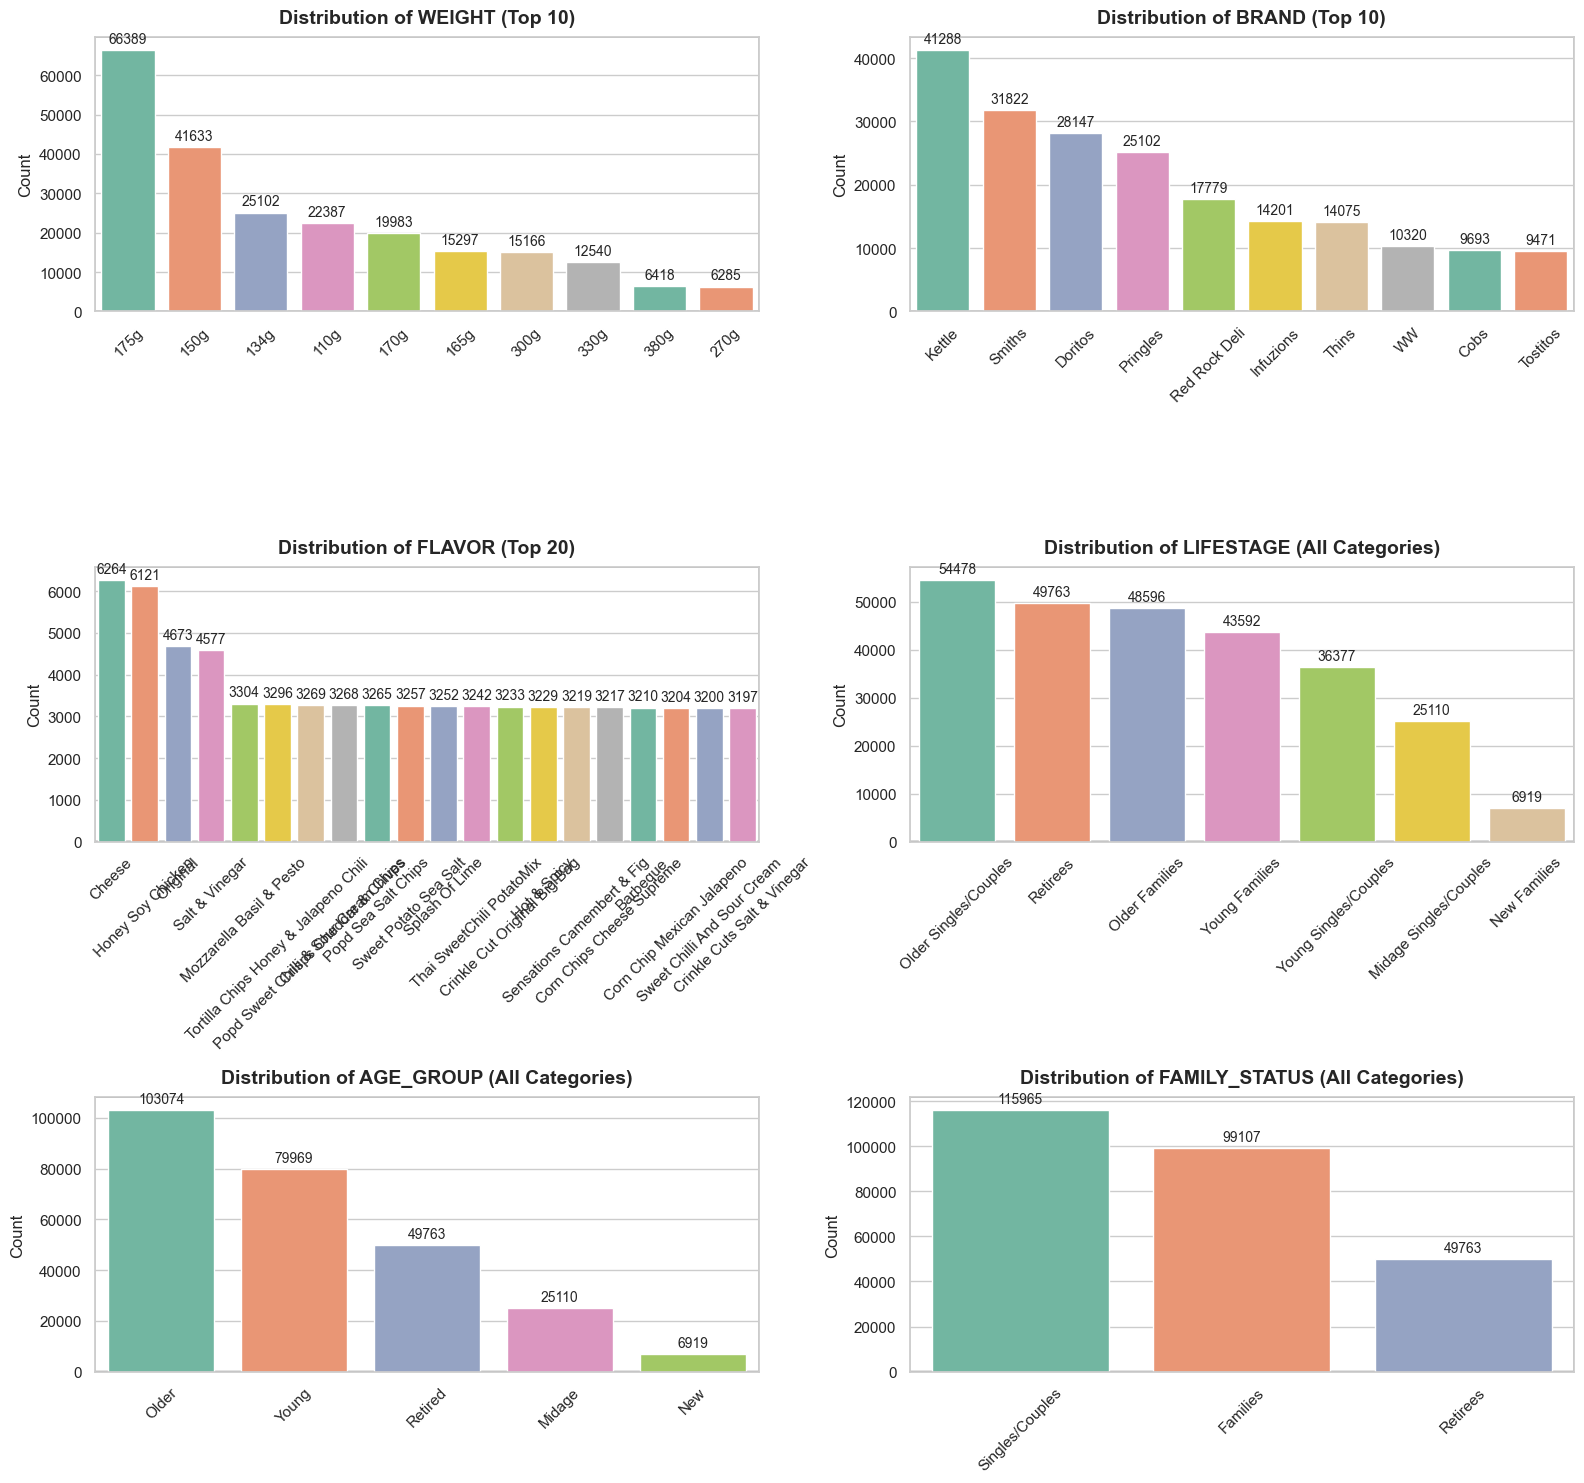

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Set Seaborn style
sns.set(style="whitegrid")

# Columns to plot
Columns = ['WEIGHT', 'BRAND', 'FLAVOR', 'LIFESTAGE', 'AGE_GROUP', 'FAMILY_STATUS']

# Top N config (rest will be excluded)
top_n_per_column = {
    'WEIGHT': 10,
    'BRAND': 10,
    'FLAVOR': 20
    # Others will show all
}

# Grid setup
num_cols = 2
num_rows = -(-len(Columns) // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))
axes = axes.flatten()

# Loop through each column
for i, col in enumerate(Columns):
    ax = axes[i]

    # Card background
    ax.set_facecolor("#f5f5f5")
    rect = FancyBboxPatch(
        (0, 0), 1, 1,
        transform=ax.transAxes,
        boxstyle="round,pad=0.03",
        linewidth=1.5,
        edgecolor="#999999",
        facecolor="#ffffff",
        mutation_scale=0.02,
        zorder=-1,
    )
    ax.add_patch(rect)

    # Top N filtering
    top_n = top_n_per_column.get(col, None)
    counts = merged_df[col].value_counts()

    if top_n is not None:
        top_values = counts[:top_n].index
        filtered_df = merged_df[merged_df[col].isin(top_values)].copy()
        title = f'Distribution of {col} (Top {top_n})'
    else:
        filtered_df = merged_df.copy()
        title = f'Distribution of {col} (All Categories)'

    # Countplot
    plot = sns.countplot(data=filtered_df, x=col, ax=ax, palette="Set2", order=filtered_df[col].value_counts().index)

    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

# Remove extra axes
for j in range(len(Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### Pie Chart

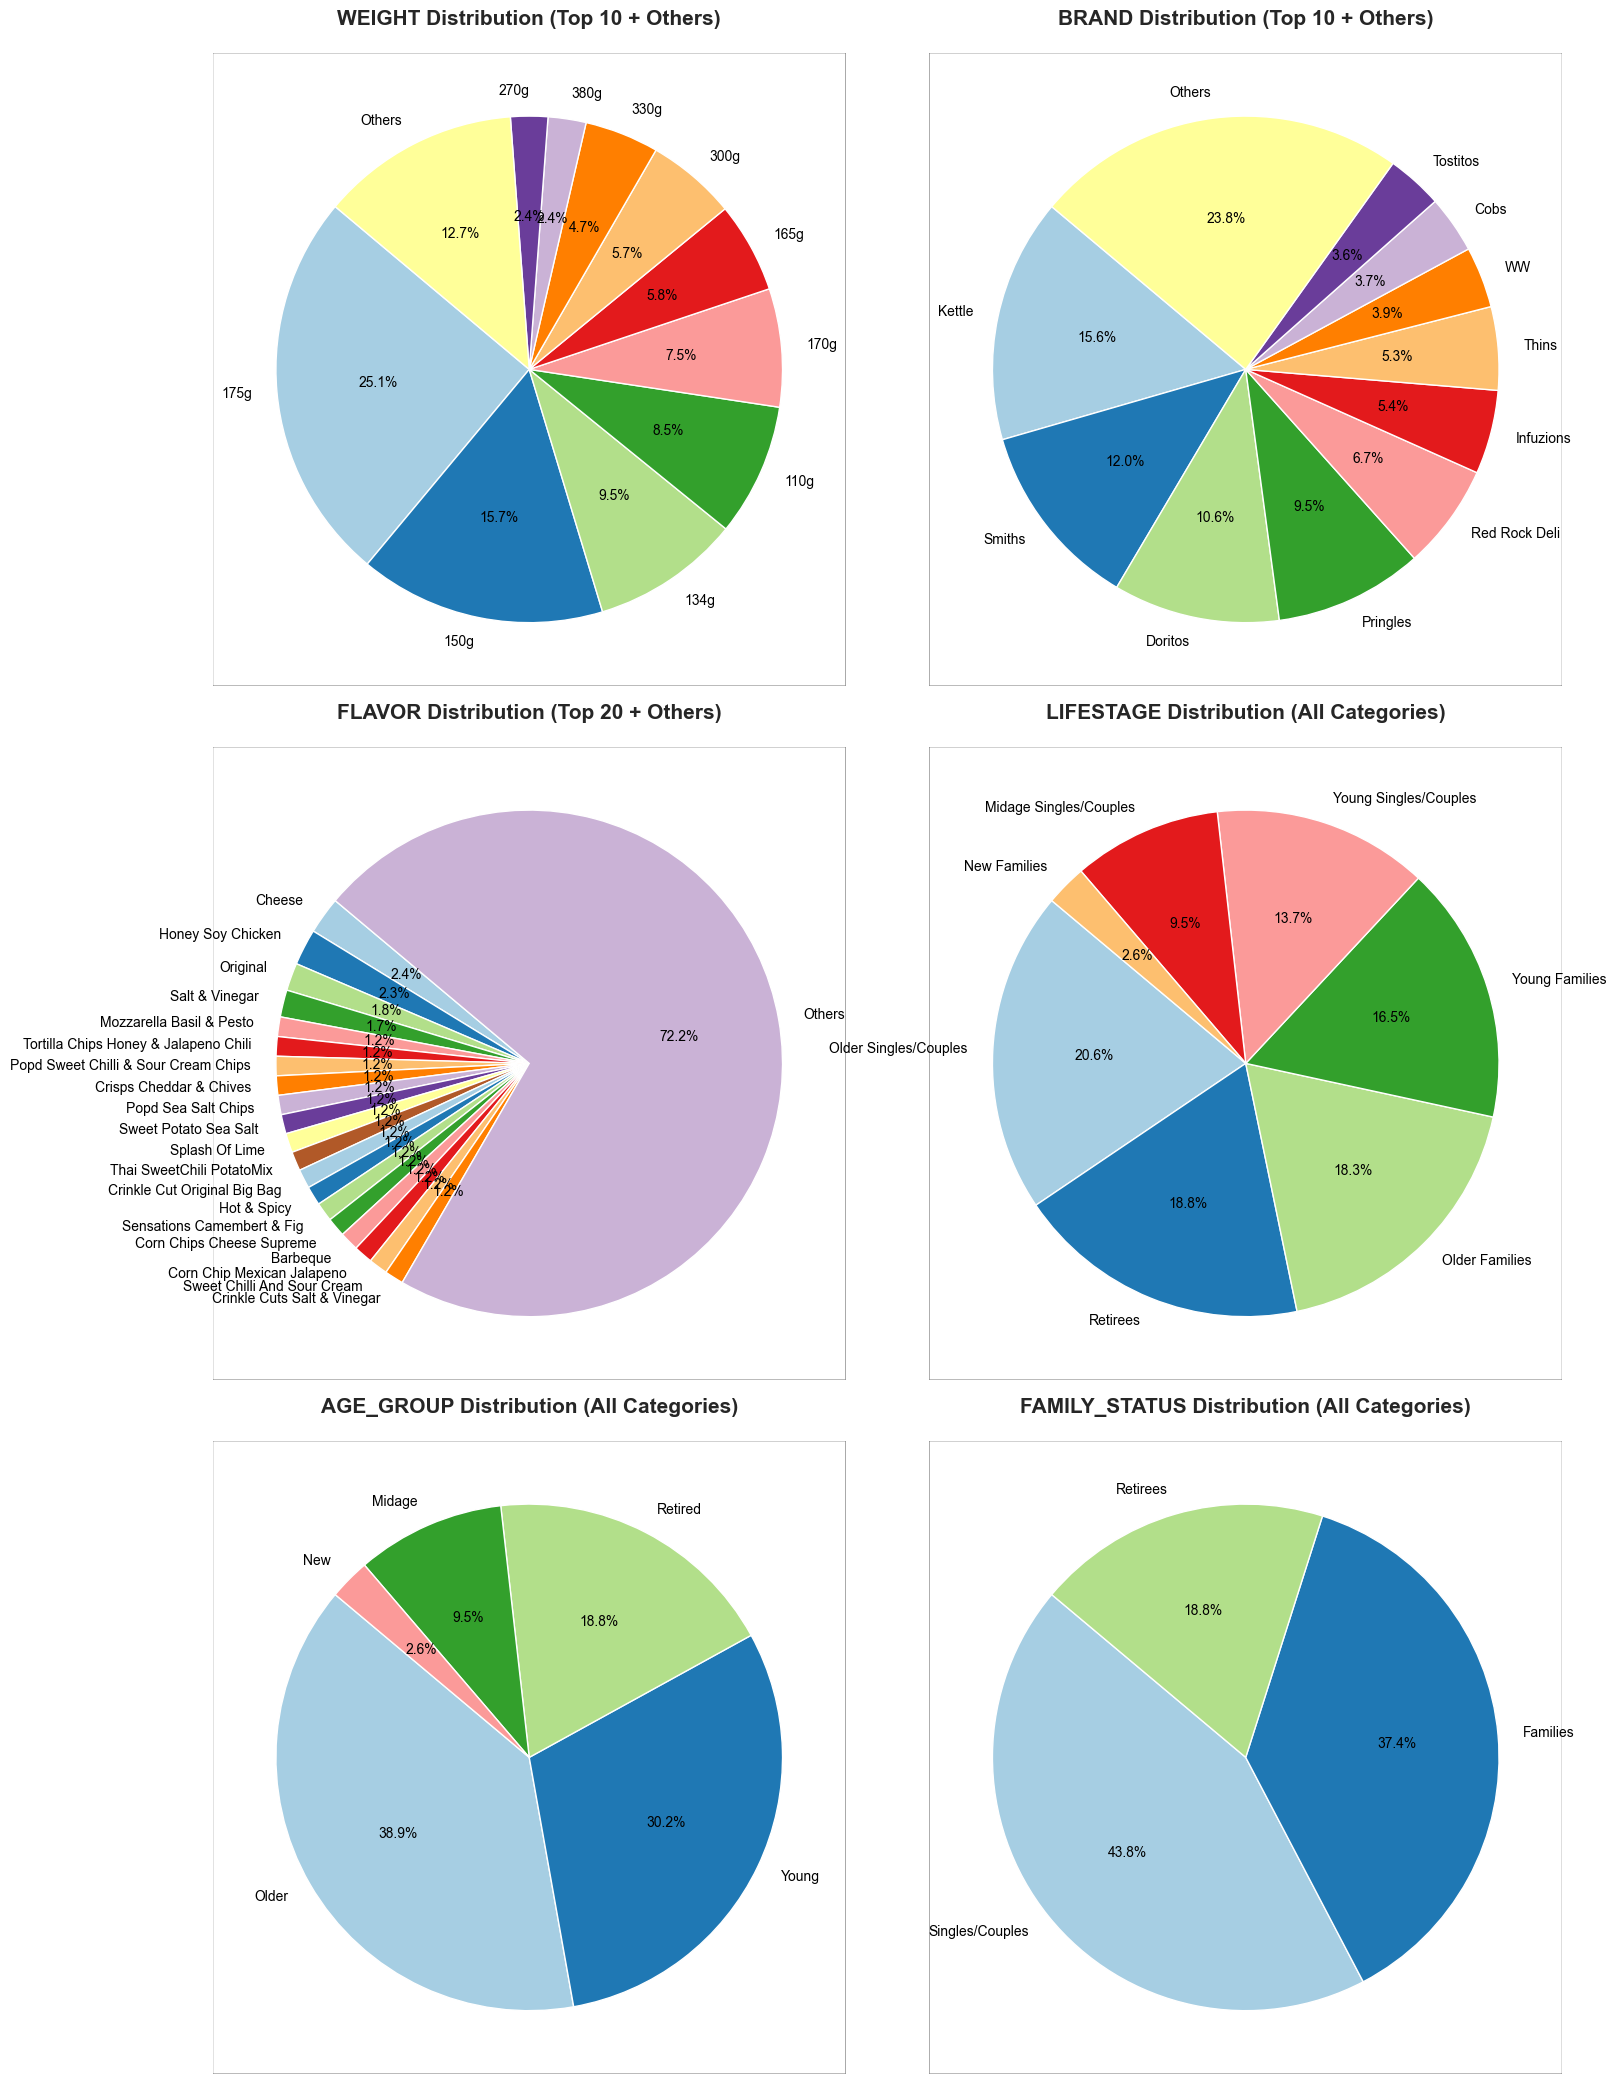

In [79]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# List of columns
Columns = ['WEIGHT', 'BRAND', 'FLAVOR', 'LIFESTAGE', 'AGE_GROUP', 'FAMILY_STATUS']

# Optional: define top_n only for selected columns
top_n_per_column = {
    'WEIGHT': 10,
    'BRAND': 10,
    'FLAVOR': 20
    # 'LIFESTAGE', 'AGE_GROUP', 'FAMILY_STATUS' will show all
}

# Grid setup
num_cols = 2
num_rows = -(-len(Columns) // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 7))
axes = axes.flatten()

# Color palette
colors = plt.cm.Paired.colors

for i, col in enumerate(Columns):
    ax = axes[i]

    # Fancy background patch (card-like)
    ax.set_facecolor("#f5f5f5")
    rect = FancyBboxPatch(
        (0, 0), 1, 1,
        transform=ax.transAxes,
        boxstyle="round,pad=0.03",
        linewidth=1.5,
        edgecolor="#999999",
        facecolor="#ffffff",
        mutation_scale=0.02,
        zorder=-1,
    )
    ax.add_patch(rect)

    # Value counts
    counts = merged_df[col].value_counts()
    top_n = top_n_per_column.get(col, None)

    if top_n is not None:
        top_counts = counts[:top_n]
        others_count = counts[top_n:].sum()
        final_counts = top_counts.copy()
        if others_count > 0:
            final_counts['Others'] = others_count
        title = f"{col} Distribution (Top {top_n} + Others)"
    else:
        final_counts = counts
        title = f"{col} Distribution (All Categories)"

    # Pie chart
    wedges, texts, autotexts = ax.pie(
        final_counts,
        labels=final_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 10, 'color': 'black'},
        wedgeprops={'edgecolor': 'white'},
        colors=colors
    )

    # Title
    ax.set_title(title, fontsize=15, fontweight='bold', pad=20)

# Remove empty axes
for j in range(len(Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### Insights


**Weight**
- Most people buy **medium-sized packs** like 175g (25.1%), 150g, and 134g.
- These three sizes make up **over half of all sales**.
- Very large or very small packs are less popular.

*Action: Focus on promoting and stocking medium pack sizes (150g–175g)*.

---

**Brand** 
- Top brands are **Kettle (15.6%)**, **Smiths (12.0%)**, and **Doritos (10.6%)**.
- The **top 4 brands (including Pringles)** make up about **50% of all sales**.

*Action: Stock and promote these leading brands to boost sales.*

---

**Flavor**
- A couple of flavors are very popular.
- However, **72.2% of sales come from many niche or less common flavors** (long-tail).
  
*Action: Keep a few popular flavors always available, but rotate niche flavors regularly to keep customers interested.*

---

**Life Stage**
- Majority buyers are **Young Families (16.5%)**, **Older Families (19.3%)**, and **Singles/Couples(43.8%)**.
- Retirees buy less

*Action: Focus marketing efforts on families and Singles/Couples*

---

**Customer Age Group**
- Most customers are **Older adults (38.9%)**, then **Young adults (30.2%)**.
- Very few young/new or middle-aged buyers.

*Action: Design messaging and products (like pack size and flavors) to suit older adults.*

---

**Family Status**
- Singles or couples make up **43.8%**.
- Families make up **37.4%**.
- Retirees are about **19%**.

*Action: Create offers tailored for both singles/couples and families.*

---

**Overall Recommendations**
- **Product:** Focus on 150–175g packs and flavors liked by families and older adults.
- **Marketing:** Target families and older adults with friendly branding and promotions.
- **Inventory:** Prioritize popular brands like Kettle and Smiths, and maintain a mix of popular and niche flavors to satisfy diverse tastes.

---



#### Numerical Data

- Product Quantity 
- Total Sales

##### Distplot

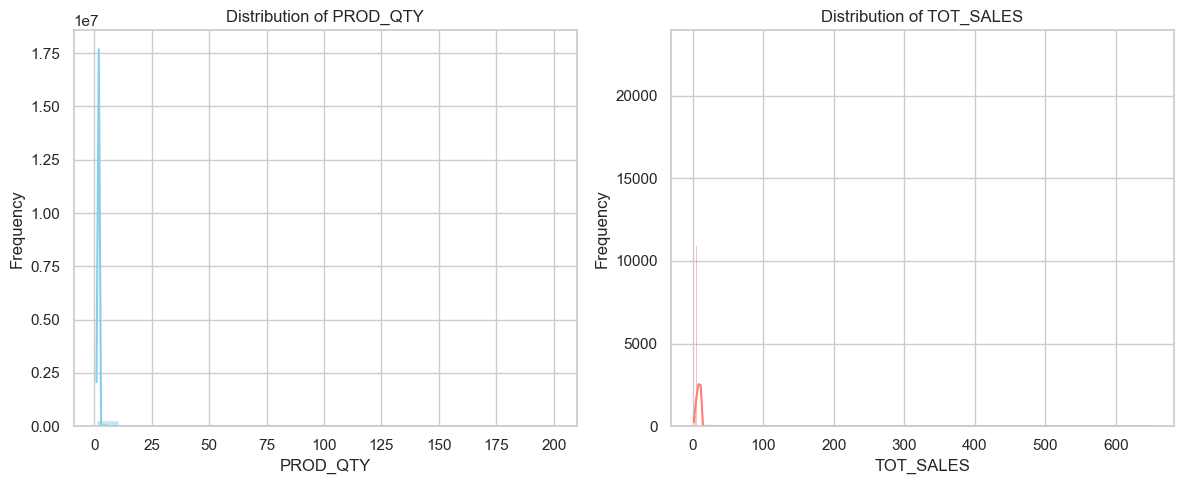

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named merged_df
# Replace merged_df with your actual dataframe variable name

plt.figure(figsize=(12, 5))

# Distribution plot for PROD_QTY
plt.subplot(1, 2, 1)
sns.histplot(merged_df['PROD_QTY'], kde=True, color='skyblue')
plt.title('Distribution of PROD_QTY')
plt.xlabel('PROD_QTY')
plt.ylabel('Frequency')

# Distribution plot for TOT_SALES
plt.subplot(1, 2, 2)
sns.histplot(merged_df['TOT_SALES'], kde=True, color='salmon')
plt.title('Distribution of TOT_SALES')
plt.xlabel('TOT_SALES')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



**The values are highly skewed**

In [111]:
sorted(merged_df['TOT_SALES'].unique())

[np.float64(1.5),
 np.float64(1.7),
 np.float64(1.8),
 np.float64(1.9),
 np.float64(2.1),
 np.float64(2.3),
 np.float64(2.4),
 np.float64(2.6),
 np.float64(2.7),
 np.float64(2.8),
 np.float64(2.9),
 np.float64(3.0),
 np.float64(3.1),
 np.float64(3.25),
 np.float64(3.3),
 np.float64(3.4),
 np.float64(3.6),
 np.float64(3.7),
 np.float64(3.8),
 np.float64(3.9),
 np.float64(4.2),
 np.float64(4.3),
 np.float64(4.4),
 np.float64(4.5),
 np.float64(4.6),
 np.float64(4.8),
 np.float64(5.1),
 np.float64(5.2),
 np.float64(5.4),
 np.float64(5.6),
 np.float64(5.7),
 np.float64(5.8),
 np.float64(5.9),
 np.float64(6.0),
 np.float64(6.2),
 np.float64(6.3),
 np.float64(6.5),
 np.float64(6.6),
 np.float64(6.8),
 np.float64(6.9),
 np.float64(7.2),
 np.float64(7.4),
 np.float64(7.5),
 np.float64(7.6),
 np.float64(7.8),
 np.float64(8.1),
 np.float64(8.4),
 np.float64(8.5),
 np.float64(8.6),
 np.float64(8.7),
 np.float64(8.8),
 np.float64(9.0),
 np.float64(9.2),
 np.float64(9.3),
 np.float64(9.5),
 np.float

In [114]:
merged_df['TOT_SALES'].value_counts()

TOT_SALES
9.2      22821
7.4      22513
6.0      20797
7.6      20212
8.8      19900
         ...  
9.3          3
6.9          3
12.4         2
650.0        2
11.2         2
Name: count, Length: 112, dtype: int64

In [115]:
merged_df['PROD_QTY'].unique()

array([  2,   3,   5,   1,   4, 200])

In [116]:
merged_df['PROD_QTY'].value_counts()


PROD_QTY
2      236038
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [ ]:
merged_df.drop(merged_df[merged_df['TOT_SALES'] > 50].index, inplace=True)
merged_df.drop(merged_df[merged_df['PROD_QTY'] > 50].index, inplace=True)

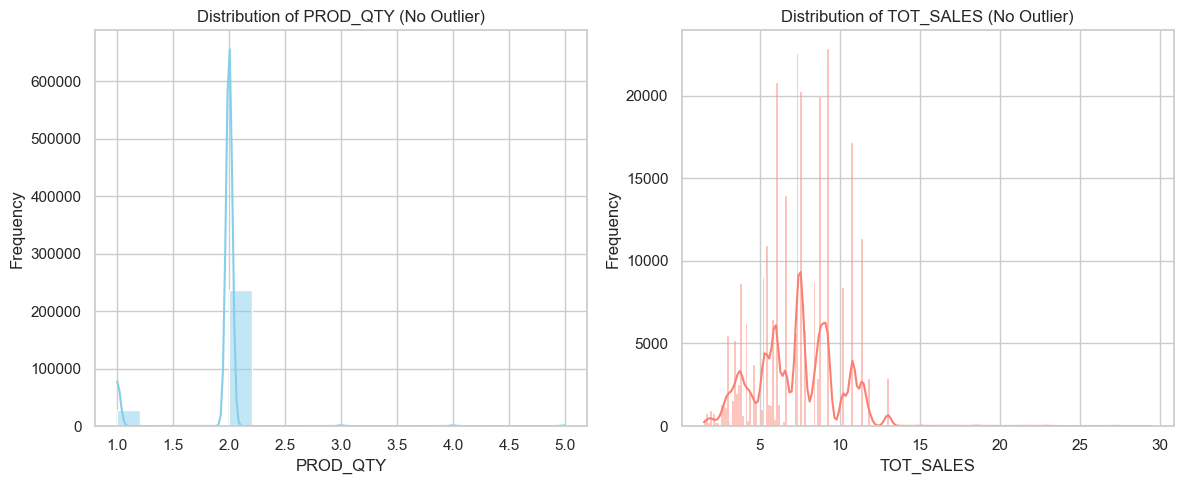

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distributions
plt.figure(figsize=(12, 5))

# PROD_QTY
plt.subplot(1, 2, 1)
sns.histplot(merged_df['PROD_QTY'], kde=True, color='skyblue')
plt.title('Distribution of PROD_QTY (No Outlier)')
plt.xlabel('PROD_QTY')
plt.ylabel('Frequency')

# TOT_SALES
plt.subplot(1, 2, 2)
sns.histplot(merged_df['TOT_SALES'], kde=True, color='salmon')
plt.title('Distribution of TOT_SALES (No Outlier)')
plt.xlabel('TOT_SALES')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### Box Plot

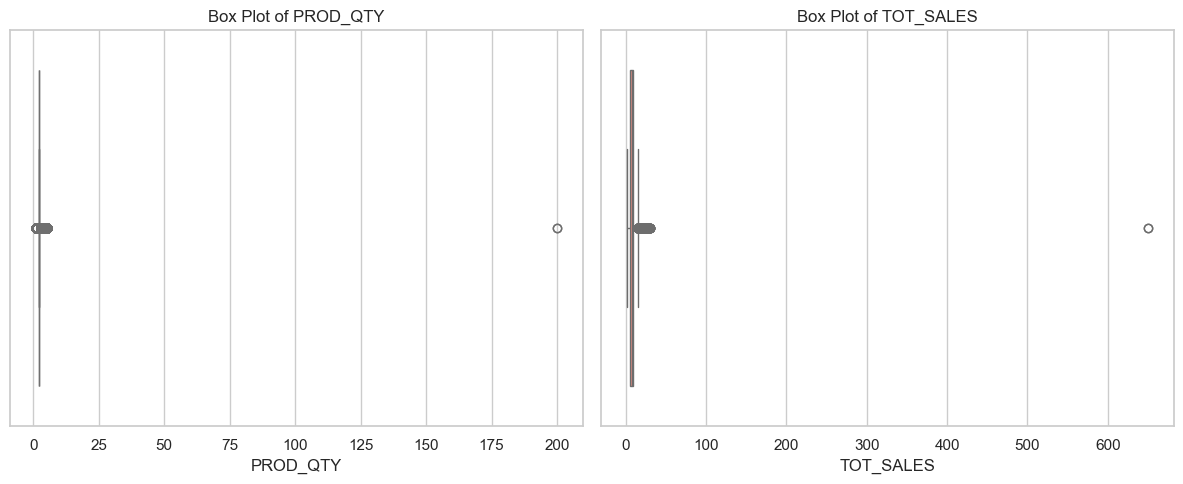

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Box plot for PROD_QTY
plt.subplot(1, 2, 1)
sns.boxplot(x=merged_df['PROD_QTY'], color='skyblue')
plt.title('Box Plot of PROD_QTY')
plt.xlabel('PROD_QTY')

# Box plot for TOT_SALES
plt.subplot(1, 2, 2)
sns.boxplot(x=merged_df['TOT_SALES'], color='salmon')
plt.title('Box Plot of TOT_SALES')
plt.xlabel('TOT_SALES')

plt.tight_layout()
plt.show()


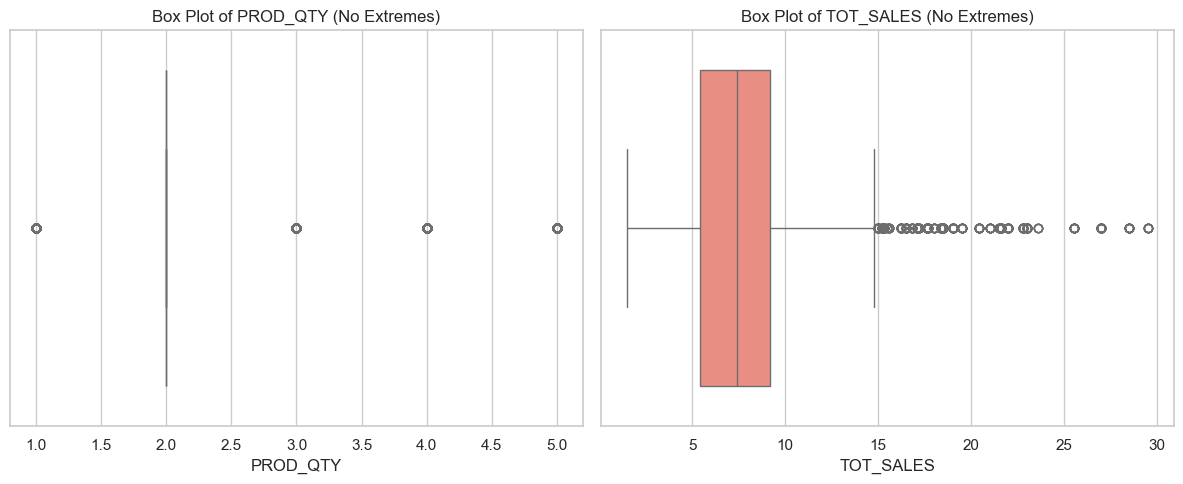

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create box plots
plt.figure(figsize=(12, 5))

# Box plot for PROD_QTY
plt.subplot(1, 2, 1)
sns.boxplot(x=merged_df['PROD_QTY'], color='skyblue')
plt.title('Box Plot of PROD_QTY (No Extremes)')
plt.xlabel('PROD_QTY')

# Box plot for TOT_SALES
plt.subplot(1, 2, 2)
sns.boxplot(x=merged_df['TOT_SALES'], color='salmon')
plt.title('Box Plot of TOT_SALES (No Extremes)')
plt.xlabel('TOT_SALES')

plt.tight_layout()
plt.show()


**Outliers are because the product has taken in bulk**

##### Insights

**Product Quantity**

- Most people buy **just 2 items**.
- A few people buy **1, 3, 4, or 5**, but that’s not common.
- So, buying **small quantities** is the usual behavior.

---

**Total Sales**

- Most people spend **between 5 and 15 units** of money.
- Some spend **much more** (even up to 30), but these cases are rare.
- This means some customers are either:
  - Buying **more expensive items**, or
  - Buying **in bulk**.

---

**Overall Insight**

- People generally buy **small amounts**, but the **money spent can vary a lot**.
- That’s probably because:
  - Some products are **more expensive than others**.
  - Not all high sales come from buying more — it could be **higher-priced items**.

---

**Action**

- Focus on offering and marketing **2-item packs**, since they are the most common.
- Identify and promote **high-value items** — those that bring in more money even in small quantities.
- Encourage sales of **higher-priced or bundled products** to increase total revenue.

---


### Multivariate

#### Scatter Plot of Product Quantity vs Total Sales

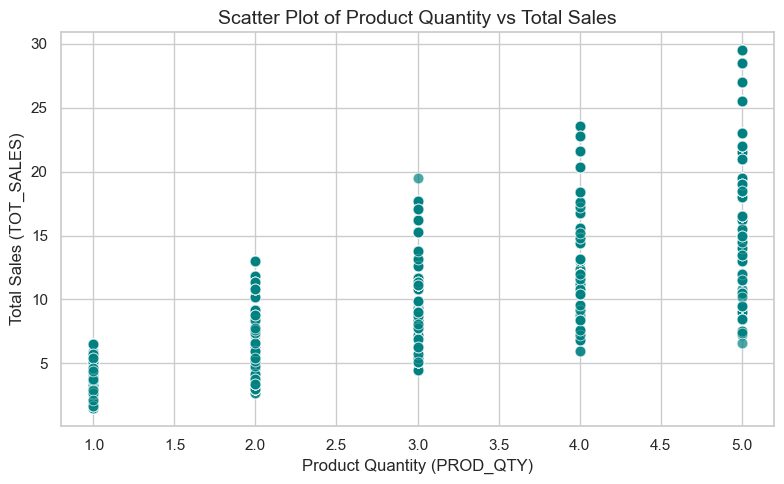

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='PROD_QTY', y='TOT_SALES', color='teal', s=60, alpha=0.7)

# Title and labels
plt.title('Scatter Plot of Product Quantity vs Total Sales', fontsize=14)
plt.xlabel('Product Quantity (PROD_QTY)', fontsize=12)
plt.ylabel('Total Sales (TOT_SALES)', fontsize=12)

plt.tight_layout()
plt.show()


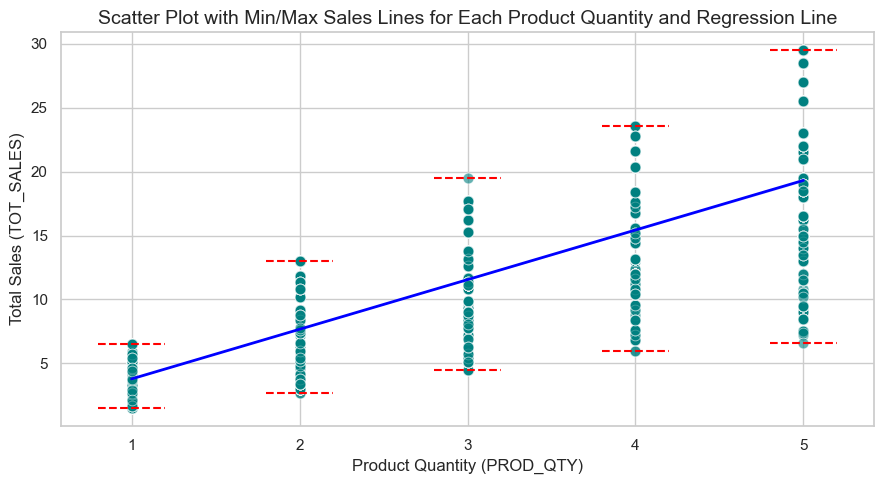

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(9, 5))
sns.scatterplot(data=merged_df, x='PROD_QTY', y='TOT_SALES', color='teal', s=60, alpha=0.6)

# Add regression line
sns.regplot(data=merged_df, x='PROD_QTY', y='TOT_SALES', scatter=False, color='blue', line_kws={"linewidth":2})

# Plot horizontal lines for each product quantity's sales range
for qty in sorted(merged_df['PROD_QTY'].unique()):
    group = merged_df[merged_df['PROD_QTY'] == qty]
    min_sale = group['TOT_SALES'].min()
    max_sale = group['TOT_SALES'].max()
    plt.hlines(y=[min_sale, max_sale], xmin=qty - 0.2, xmax=qty + 0.2, colors='red', linestyles='--', linewidth=1.5)

# Labels and title
plt.title('Scatter Plot with Min/Max Sales Lines for Each Product Quantity and Regression Line', fontsize=14)
plt.xlabel('Product Quantity (PROD_QTY)', fontsize=12)
plt.ylabel('Total Sales (TOT_SALES)', fontsize=12)
plt.tight_layout()
plt.show()


Insights from Scatter Plot: Product Quantity vs Total Sales

- **Positive Trend:**  
  As product quantity (`PROD_QTY`) increases, total sales (`TOT_SALES`) also tend to increase.  
  This is expected — more items generally mean a higher bill.

- **Wide Spending Range for Same Quantity:**  
  Even for the same quantity, there's a wide range of spending.  
  For example:
  - With **2 items**, customers spent anywhere from just **₹4** to over **₹13**
  - With **5 items**, spending ranged from around **₹10** to nearly **₹30**

- **Product Price Variation:**  
  Not all products are priced the same.  
  The scatter shows a **mix of low-priced and high-priced items**, as evident from the variability in sales at each quantity level.

- **Greater Variation at Higher Quantities:**  
  At higher `PROD_QTY` values like **4 or 5**, the **spread in total sales increases**.  
  This could be due to some customers **bulk buying high-priced items**.



#### Bar Chart on Average Total Sales by BRAND

**Product vs Total Sales**
   
   Aggregate `TOT_SALES` for each `PROD_NAME` to determine revenue-driving products.

   - Identify bestsellers


C:\Users\HP\AppData\Local\Temp\ipykernel_24964\1883671907.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


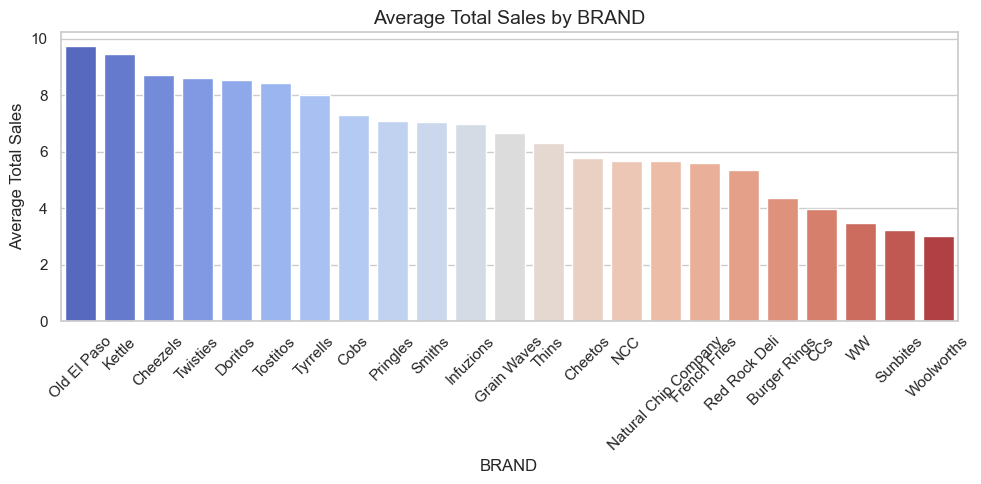

In [ ]:
# Grouping and sorting
avg_sales = merged_df.groupby('BRAND')['TOT_SALES'].mean().sort_values(ascending=False)

# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_sales.index,
    y=avg_sales.values,
    palette='coolwarm'
)
plt.xticks(rotation=45)
plt.title('Average Total Sales by BRAND', fontsize=14)
plt.ylabel('Average Total Sales')
plt.xlabel('BRAND')
plt.tight_layout()
plt.show()

**Got to know the TOP BRANDS which increase SALES** 
- To know to Top Flavors of Top Brands, will plot the flavors for individual Brand

#### Brands with Top Flavors and Weight 

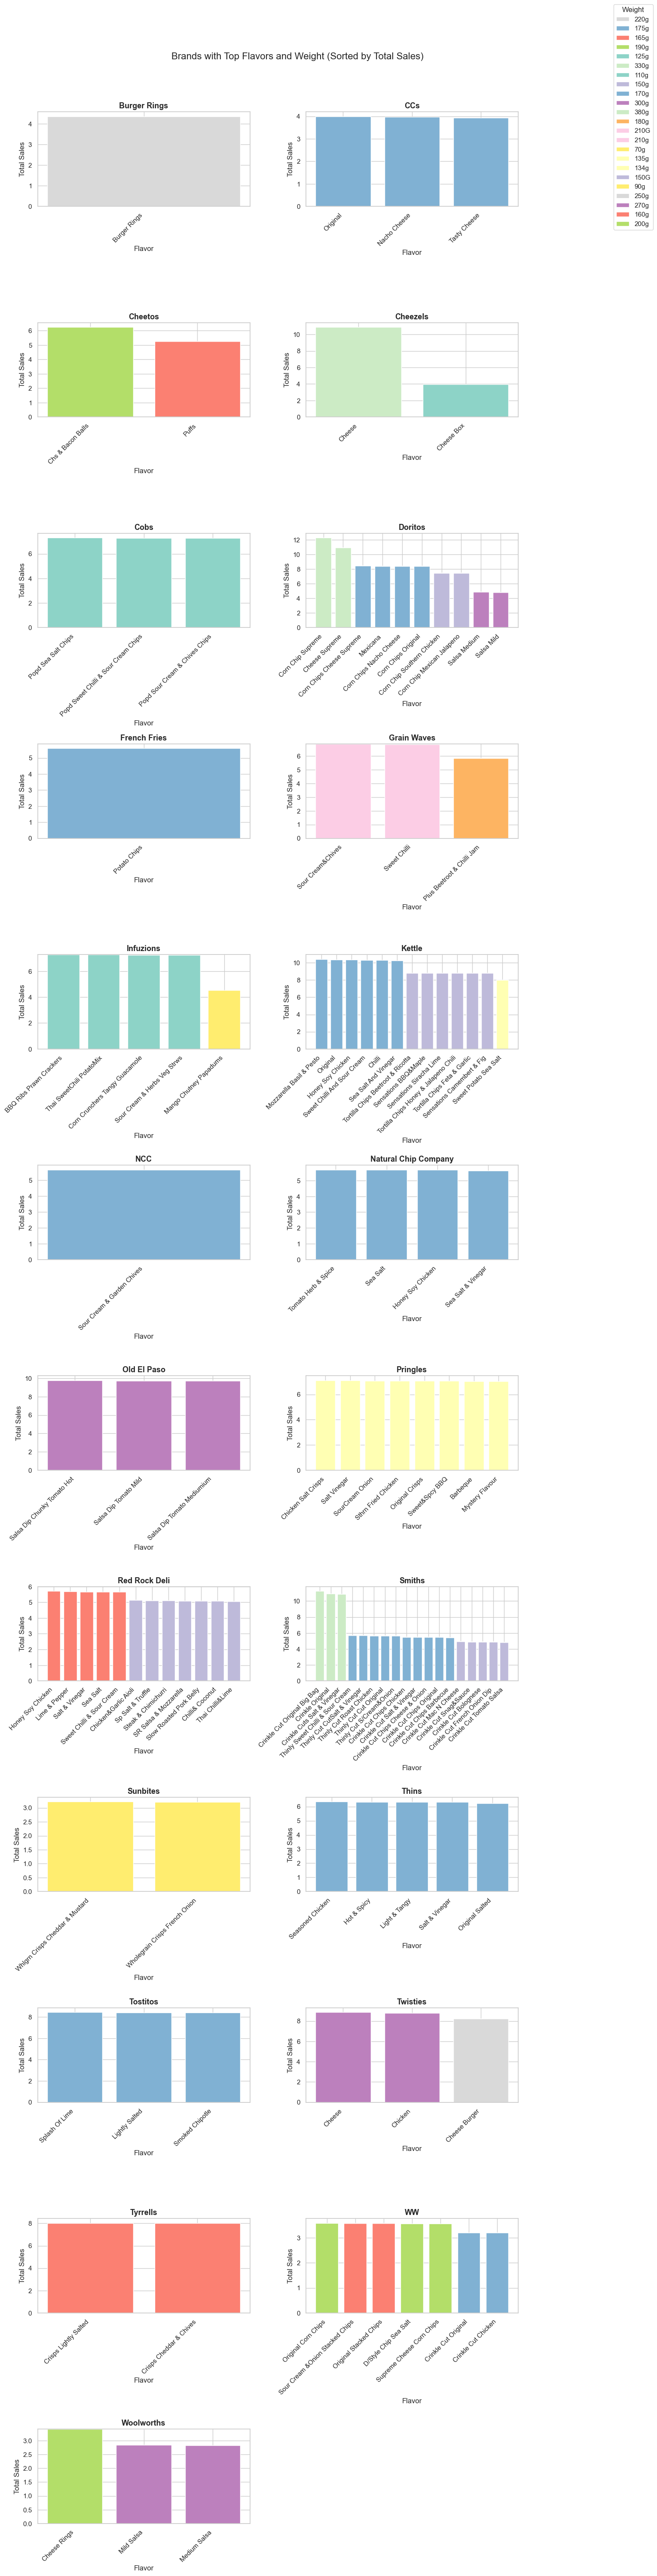

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Group and aggregate total sales by BRAND, FLAVOR, WEIGHT
grouped = (
    merged_df.groupby(['BRAND', 'FLAVOR', 'WEIGHT'])['TOT_SALES']
    .mean()
    .reset_index()
)

brands = grouped['BRAND'].unique()
n_brands = len(brands)

cols = 2
rows = int(np.ceil(n_brands / cols))

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), squeeze=False)

unique_weights = grouped['WEIGHT'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_weights)))
weight_color_map = dict(zip(sorted(unique_weights), colors))

all_handles = []
all_labels = []

for idx, brand in enumerate(brands):
    r, c = divmod(idx, cols)
    ax = axes[r][c]

    brand_df = grouped[grouped['BRAND'] == brand]
    pivot = brand_df.pivot_table(
        index='FLAVOR', columns='WEIGHT', values='TOT_SALES', fill_value=0
    )
    
    # Sort flavors by total sales (sum over all weights), descending
    pivot['total'] = pivot.sum(axis=1)
    pivot = pivot.sort_values('total', ascending=False)
    pivot = pivot.drop(columns='total')

    bottom = np.zeros(len(pivot))
    for weight in sorted(pivot.columns):
        bars = ax.bar(
            pivot.index, 
            pivot[weight], 
            bottom=bottom, 
            label=weight, 
            color=weight_color_map[weight]
        )
        bottom += pivot[weight]

        # Collect handles and labels for combined legend
        if weight not in all_labels:
            all_handles.append(bars[0])
            all_labels.append(weight)

    ax.set_title(f'{brand}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Flavor')
    ax.set_ylabel('Total Sales')
    ax.set_xticks(range(len(pivot.index)))
    ax.set_xticklabels(pivot.index, rotation=45, ha='right')

# Remove empty subplots if any
for i in range(n_brands, rows * cols):
    fig.delaxes(axes[i // cols][i % cols])

# Create one combined legend for all weights across all brands
fig.legend(all_handles, all_labels, title="Weight", bbox_to_anchor=(1.02, 1), loc="upper left")

fig.suptitle("Brands with Top Flavors and Weight (Sorted by Total Sales)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.88, 0.97])
plt.show()


**Got the top Flavors for each Brand** 
 
 - To increase sales, should keep the top brands with top flavors.

Flavor vs Packet Size Insight

- Each flavor across all brands is available in **only one packet size**.

- So, for every flavor, there's a **unique weight** — no size variation within the same flavor.


In [ ]:
grouped.groupby(['BRAND', 'FLAVOR']).size().value_counts()

1    114
Name: count, dtype: int64

#### Sales Across Different Stores 



Compare total sales across different `STORE_NBR`.
 
- Identify high-performing and underperforming stores
- Detect location-based preferences


In [156]:
merged_df['STORE_NBR'].value_counts()

STORE_NBR
226    2020
88     1873
93     1832
165    1819
237    1785
       ... 
31        2
206       2
11        2
76        1
92        1
Name: count, Length: 272, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_24964\2245134949.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




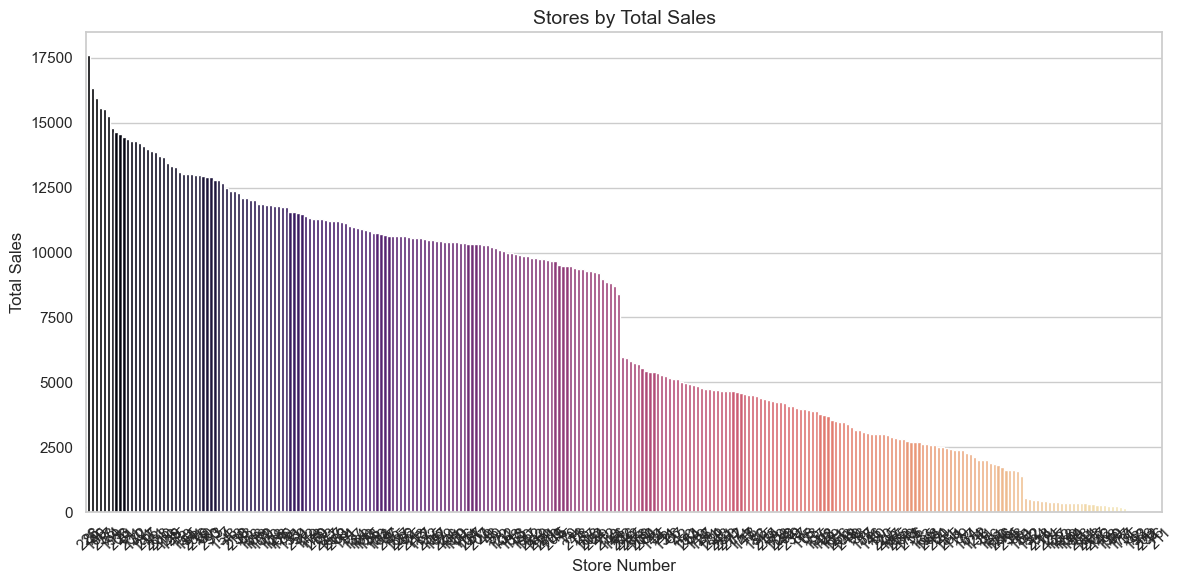

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

store_sales = (
    merged_df.groupby('STORE_NBR')['TOT_SALES']
    .sum()
    .reset_index()
    .sort_values('TOT_SALES', ascending=False)
)

# Plot sorted bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=store_sales,
    x='STORE_NBR',
    y='TOT_SALES',
    order=store_sales['STORE_NBR'],  # Ensures sorted order
    palette='magma'
)

plt.title('Stores by Total Sales', fontsize=14)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_24964\3577462593.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




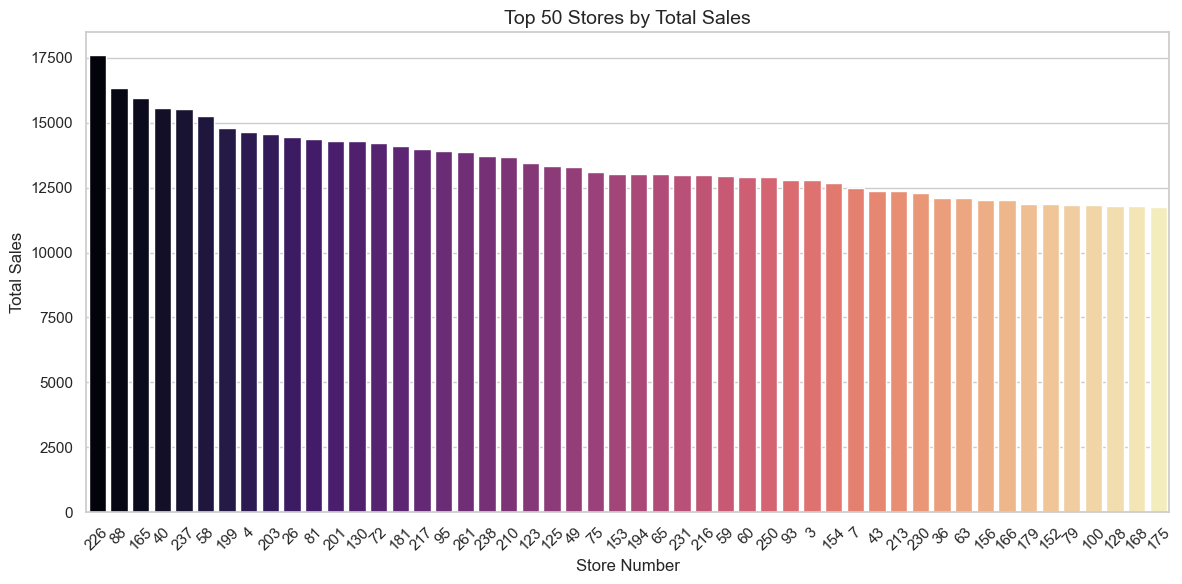

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group total sales by STORE_NBR and get top 20
store_sales = (
    merged_df.groupby('STORE_NBR')['TOT_SALES']
    .sum()
    .reset_index()
    .sort_values('TOT_SALES', ascending=False)
    .head(50)
)

# Plot sorted bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=store_sales,
    x='STORE_NBR',
    y='TOT_SALES',
    order=store_sales['STORE_NBR'],  # Ensures sorted order
    palette='magma'
)

plt.title('Top 50 Stores by Total Sales', fontsize=14)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Action Plan for Stores Based on Sales Performance**

**Stores with High Sales**
- Ensure consistent stock availability and excellent customer service.
- Identify key drivers such as location, promotions, and product mix.
- Use successful stores as benchmarks and replicate their strategies elsewhere.
- Implement rewards to retain frequent customers and encourage repeat purchases.

**Stores with Low Sales**
- Examine potential issues like supply chain problems, location disadvantages, competition, or poor customer experience.
- Remove slow-moving products and focus on popular items.
- Run targeted promotions or discounts to increase footfall.
- Enhance customer service and sales skills.
- Evaluate relocation or closure if poor performance persists consistently.


#### Product Popularity

##### Product Popularity by Life Stage


 
Understand which products are most preferred by different life stages such as:
- YOUNG FAMILIES
- OLDER SINGLES/COUPLES
- RETIREES

Helps in targeted marketing — e.g., promoting family-size packs to young families or smaller snack packs to older singles.

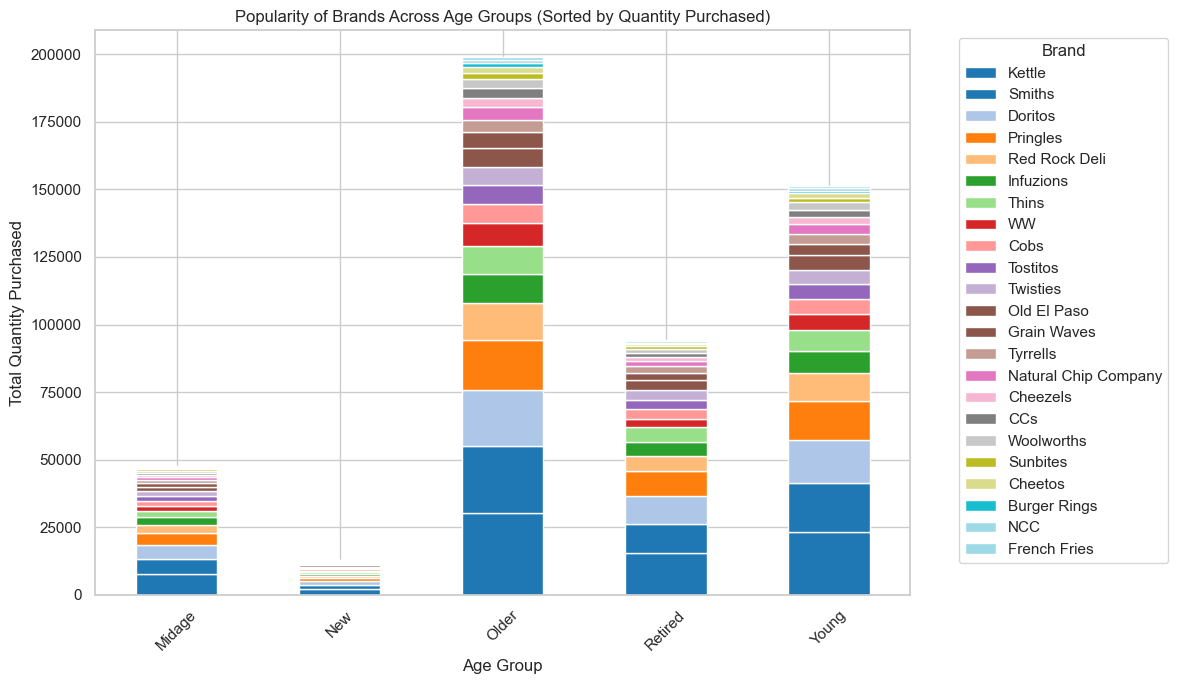

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Brands by total quantity purchased overall
top_brands = (
    merged_df.groupby('BRAND')['PROD_QTY']
    .sum()
    .sort_values(ascending=False)
    .index
)

# Filter for top brands only
filtered_df = merged_df[merged_df['BRAND'].isin(top_brands)]

# Group by AGE_GROUP and BRAND, sum quantity purchased
brand_age_qty = filtered_df.groupby(['AGE_GROUP', 'BRAND'])['PROD_QTY'].sum().reset_index()

# Pivot for plotting
pivot_df = brand_age_qty.pivot(index='AGE_GROUP', columns='BRAND', values='PROD_QTY').fillna(0)

# Order columns by total quantity descending (overall)
brand_order = pivot_df.sum(axis=0).sort_values(ascending=False).index

# Reorder columns
pivot_df = pivot_df[brand_order]

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Popularity of Brands Across Age Groups (Sorted by Quantity Purchased)')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From the Average Sales, we saw that **Old El Paso is a top brand** which gives **high sales**, but people purchase in **less quantity**, because may be it is costly. 

**Kettle** on the other hand, people buy in **more quantity**, which gives **high sales**, here we can't say about the cost. 

To get better insight for it, we can plot Sales, Quantity ratio.

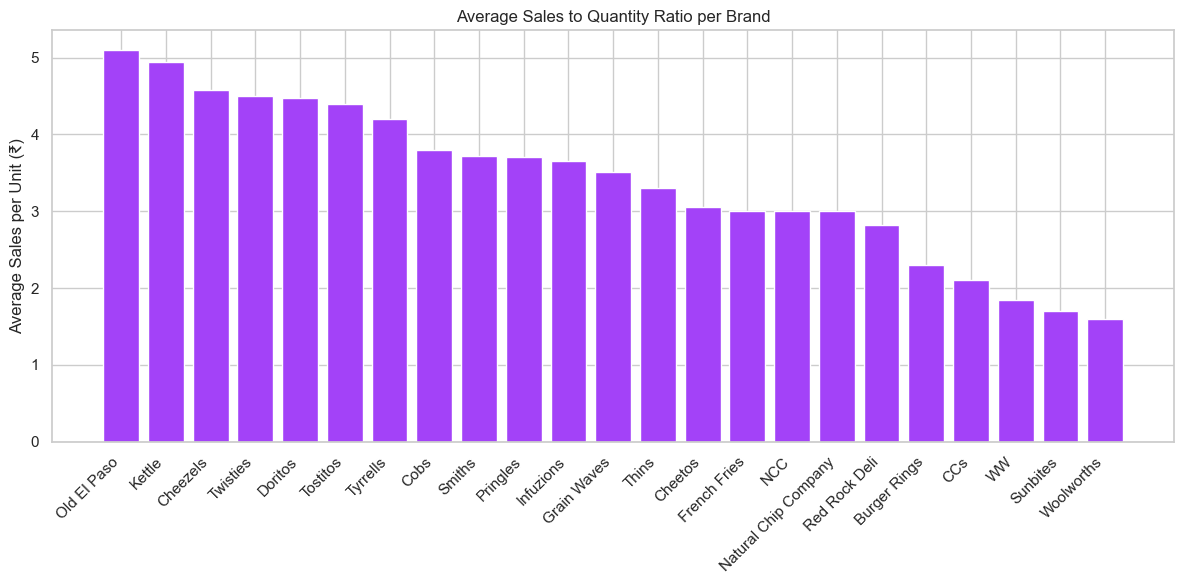

In [196]:
import matplotlib.pyplot as plt

# Aggregate total quantity and total sales per brand
brand_summary = merged_df.groupby('BRAND').agg({
    'PROD_QTY': 'sum',
    'TOT_SALES': 'sum'
}).reset_index()

# Calculate sales-to-quantity ratio (average price per unit)
brand_summary['Sales_to_Quantity_Ratio'] = brand_summary['TOT_SALES'] / brand_summary['PROD_QTY']

# Sort by ratio descending
brand_summary = brand_summary.sort_values(by='Sales_to_Quantity_Ratio', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(brand_summary['BRAND'], brand_summary['Sales_to_Quantity_Ratio'], color="#A342F8")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Sales per Unit (₹)')
plt.title('Average Sales to Quantity Ratio per Brand')
plt.tight_layout()
plt.show()


- **Higher ratio** means that brand’s items tend to be costlier or sold at higher prices per unit.

- **Lower ratio** means cheaper or discounted products per unit.


From the above two graphs **Popularity of Brands Across Age Groups (Sorted by Quantity Purchased)** and 
**Average Sales to Quantity Ratio per Brand** 
On the stores having **less sales**, brands which give **high sales, on high quantity** should be marketed and once the sales goes up, should market the costlier item.

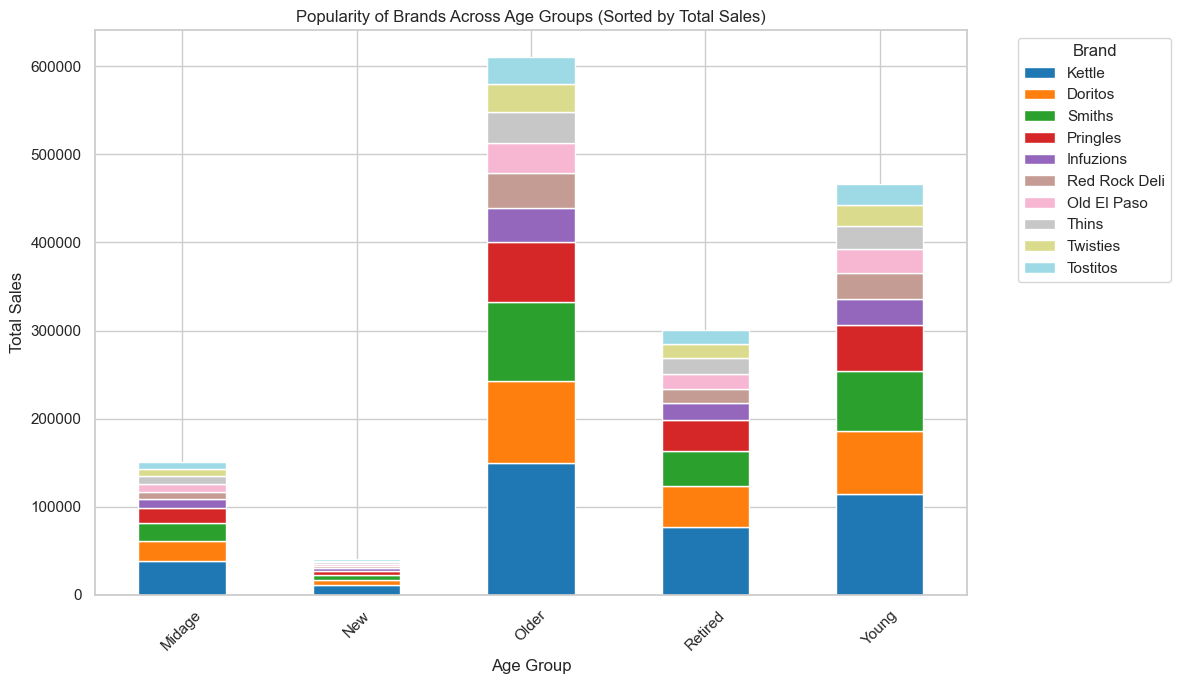

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top brands by total sales 
top_brands = (
    merged_df.groupby('BRAND')['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter for top brands only
filtered_df = merged_df[merged_df['BRAND'].isin(top_brands)]

# Group by AGE_GROUP and BRAND, sum quantity purchased
brand_age_qty = filtered_df.groupby(['AGE_GROUP', 'BRAND'])['TOT_SALES'].sum().reset_index()

# Pivot for plotting
pivot_df = brand_age_qty.pivot(index='AGE_GROUP', columns='BRAND', values='TOT_SALES').fillna(0)

# Order columns by total quantity descending (overall)
brand_order = pivot_df.sum(axis=0).sort_values(ascending=False).index

# Reorder columns
pivot_df = pivot_df[brand_order]

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Popularity of Brands Across Age Groups (Sorted by Total Sales)')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**From the above graph it can be seen that every age group prefer same type of brands.**

**Popular product**

- The most popular brands are  **Kettle, Doritos, Smiths and Pringles** , they are purchased in **high quantity** as well as have **high sales**. 

- Secondly **Old El Paso** is also popular, it is purchased in **low quantity** but still gives **highest sales**.

##### Product Popularity Among Premium Customers


   Find out which products are mostly bought by **Premium** spenders vs **Budget** or **Mainstream** segments.
   Brands can:
   - Upsell premium products to high-value customers

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




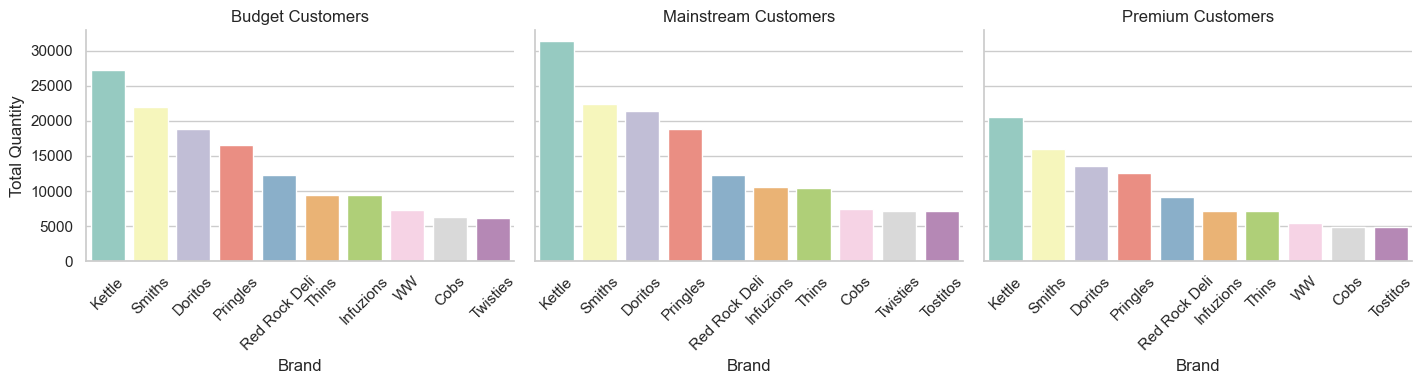

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by PREMIUM_CUSTOMER and BRAND, then sum the quantity
grouped = (
    merged_df.groupby(['PREMIUM_CUSTOMER', 'BRAND'])['PROD_QTY']
    .sum()
    .reset_index()
)

# Sort and get top 5 brands per customer tier
top5_by_tier = (
    grouped.sort_values(['PREMIUM_CUSTOMER', 'PROD_QTY'], ascending=[True, False])
    .groupby('PREMIUM_CUSTOMER')
    .head(10)
)

# Plot using FacetGrid
g = sns.FacetGrid(top5_by_tier, col='PREMIUM_CUSTOMER', col_order=['Budget', 'Mainstream', 'Premium'], sharex=False, height=4, aspect=1.2)
g.map_dataframe(sns.barplot, x='BRAND', y='PROD_QTY', palette='Set3')
g.set_titles(col_template="{col_name} Customers")
g.set_axis_labels("Brand", "Total Quantity")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




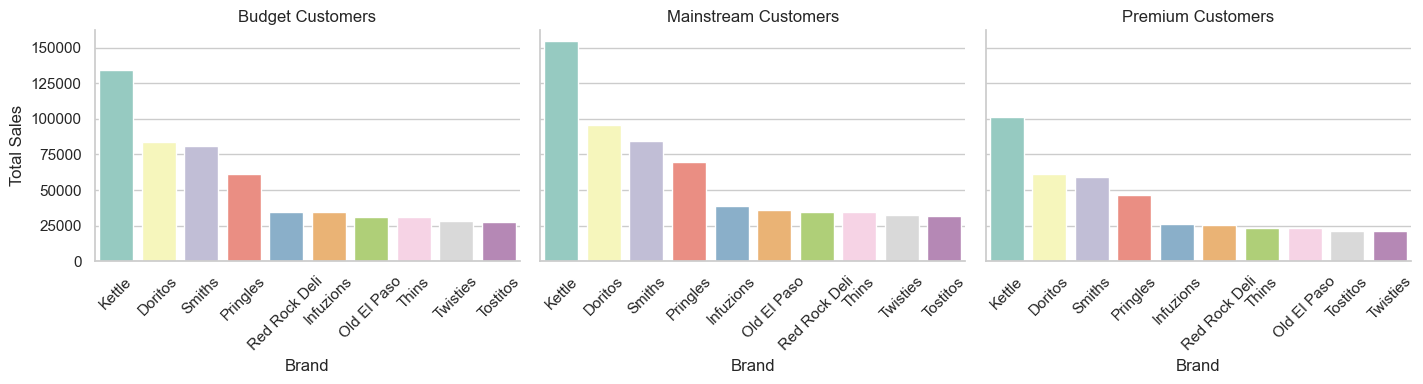

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by PREMIUM_CUSTOMER and BRAND, then sum the quantity
grouped = (
    merged_df.groupby(['PREMIUM_CUSTOMER', 'BRAND'])['TOT_SALES']
    .sum()
    .reset_index()
)

# Sort and get top 5 brands per customer tier
top5_by_tier = (
    grouped.sort_values(['PREMIUM_CUSTOMER', 'TOT_SALES'], ascending=[True, False])
    .groupby('PREMIUM_CUSTOMER')
    .head(10)
)

# Plot using FacetGrid
g = sns.FacetGrid(top5_by_tier, col='PREMIUM_CUSTOMER', col_order=['Budget', 'Mainstream', 'Premium'], sharex=False, height=4, aspect=1.2)
g.map_dataframe(sns.barplot, x='BRAND', y='TOT_SALES', palette='Set3')
g.set_titles(col_template="{col_name} Customers")
g.set_axis_labels("Brand", "Total Sales")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()


Here we can insight based on Quantity and Sales , all categories prefer same type of brands, their is no brand segmentation based on the categories
- **Kettle , Smiths, Doritos, Pringles, Red Rock Deli** are popular in all categories

##### Family Status vs Quantity Purchased


   Helps in knowing which LIFESTYLE buy more.

   - Can make packages which attract a particular category to increase sales.


C:\Users\HP\AppData\Local\Temp\ipykernel_24964\2600732877.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




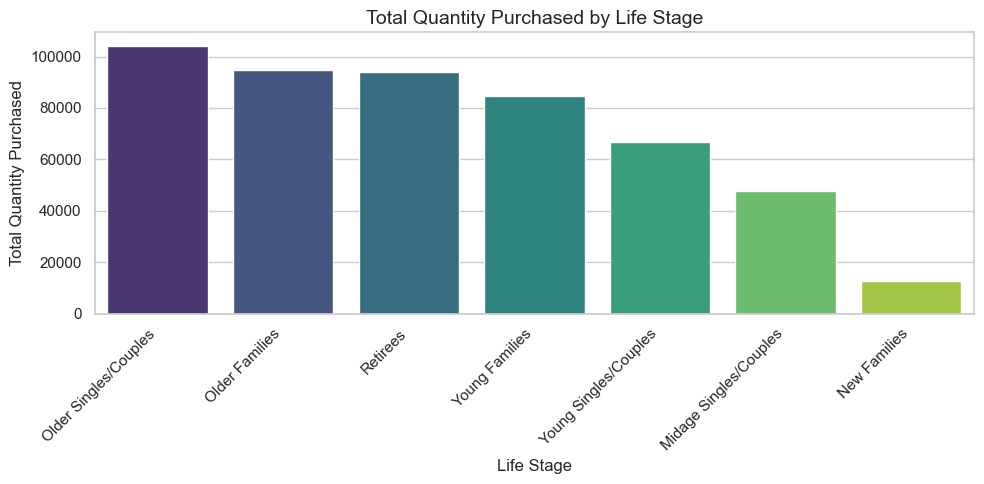

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by LIFESTAGE and sum the quantity purchased
life_qty = (
    merged_df.groupby('LIFESTAGE')['PROD_QTY']
    .sum()
    .reset_index()
    .sort_values('PROD_QTY', ascending=False)
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=life_qty, x='LIFESTAGE', y='PROD_QTY', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Quantity Purchased by Life Stage', fontsize=14)
plt.xlabel('Life Stage')
plt.ylabel('Total Quantity Purchased')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_24964\3064028441.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




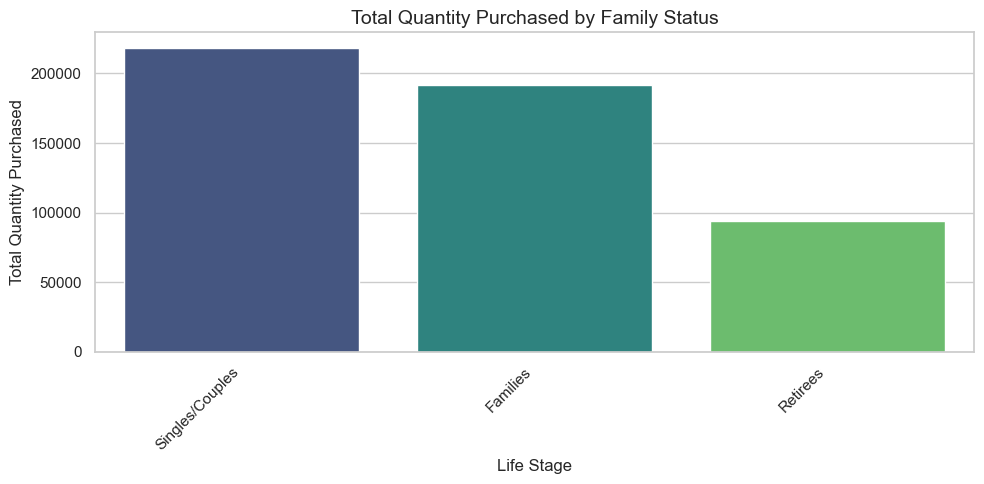

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by FAMILY_STATUS and sum the quantity purchased
life_qty = (
    merged_df.groupby('FAMILY_STATUS')['PROD_QTY']
    .sum()
    .reset_index()
    .sort_values('PROD_QTY', ascending=False)
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=life_qty, x='FAMILY_STATUS', y='PROD_QTY', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Quantity Purchased by Family Status', fontsize=14)
plt.xlabel('Life Stage')
plt.ylabel('Total Quantity Purchased')
plt.tight_layout()
plt.show()


From the Above two graphs, insights can be:
**Older and Younger** people buy more, regardless of families or single/couple.

**Customer Segmentation**
- The main customer Segmentation should be Older and Younger people. 
- Make flavors and scheme for them.
- Do something fun to attract middle age, since in future, they will be the customers. 

## EDA Summary



#### Key Findings

**Product Size (Weight)**
- **Medium-sized packs (150g–175g)** are the most popular, especially **175g (25.1%)**.
- These account for **over half of all sales**.
- Very large or very small packs are less preferred.

*Focus on promoting and stocking 150g–175g packs.*

---

**Brands**
- **Top Brands:**  
  - Kettle (**15.6%**)  
  - Smiths (**12.0%**)  
  - Doritos (**10.6%**)  
  - Pringles (also in top 4)

- These top 4 brands make up **~50% of total sales**.

*Stock and promote top brands to maximize revenue.*

---

**Flavors**
- A few flavors dominate, but **72.2% of sales come from niche/less common flavors**.

*Always keep top flavors, but rotate niche ones to maintain customer interest.*

---

**Life Stage**
- Most buyers are:
  - **Singles/Couples (43.8%)**
  - **Older Families (19.3%)**
  - **Young Families (16.5%)**
- **Retirees buy less.**

*Focus marketing on families and singles/couples.*

---

**Customer Age Group**
- Most purchases are by:
  - **Older Adults (38.9%)**
  - **Young Adults (30.2%)**

*Tailor products (size, flavor) and messaging for older adults.*

---

**Family Status**
- **Singles/Couples:** 43.8%  
- **Families:** 37.4%  
- **Retirees:** ~19%

Create offers for singles/couples and families.*

---

**Product Quantity**
- Most customers buy **2 items**.
- Buying more (3–5) is **rare**.

*Offer and promote 2-item packs.*

---

**Total Sales**
- Most spend between **₹5–₹15**.
- Some spend up to **₹30**, likely due to:
  - **Higher-priced products**
  - **Bulk purchases**

*Promote high-value items and bundle offers to boost revenue.*

---

**Scatter Plot: Quantity vs. Sales**
- **Positive trend**: More items → higher sales.
- **Spending varies** widely even for same quantity — reflects product price differences.
- **Higher quantities** show greater variation in total sales.

*Use price-per-unit analysis to target high-margin products.*

---

**Top Brands & Flavors**
- **Kettle, Doritos, Smiths, Pringles** → high sales + high quantity.
- **Old El Paso** → high sales but **low quantity** (likely costly).
- Popular across **all age groups** — no major brand segmentation.

*Promote top brands with their top flavors.*

---

**Sales to Quantity Ratio**
- High ratio → **costlier products**.
- Low ratio → **cheaper or discounted items**.

*In low-performing stores, push brands with high quantity/sales. Once sales grow, market premium items.*

---

**Customer Segmentation**
- **Older & Younger people buy more** across all life stages.
- **Middle-aged customers underrepresented.**

Focus marketing on older/younger adults. Develop strategies to attract middle-aged customers (future buyers).

---

#### Store-Level Actions

**High-Sales Stores**
- Keep top products in stock.
- Maintain excellent service.
- Replicate successful practices in other stores.

**Low-Sales Stores**
- Check for location/supply/service issues.
- Remove slow-moving items.
- Run **targeted discounts/promos**.
- Consider relocation if performance stays low.

---

#### Final Recommendations

- **Product Strategy:**  
  Focus on 150–175g sizes, top brands, and flavor variety.

- **Marketing Strategy:**  
  Target older/younger customers, and create engagement tactics for middle-aged ones.

- **Inventory Strategy:**  
  Prioritize fast-moving brands/flavors. Promote bundles and high-value items.
